# Проект "Анализ и сегментация клиентов банка 'Метанпром' по количеству потребляемых продуктов"


## 1 1 Описание проекта

Исходные данные: в нашем распоряжении находятся  содержит данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.

  Цель исследования:

* проанализировать клиентов регионального банка и сегментировать пользователей по количеству потребляемых продуктов, обращая особое внимание на отток; 
* сформулировать и проверить  статистическую гипотезу относительно представленных данных 


 

   




## 2 2 Описание данных

Необходимые данные расположены в файле: '/datasets/bank_scrooge.csv' 

Всего в датафрейме 12 столбцов: 

* USERID — идентификатор пользователя,
* score — баллы кредитного скоринга,
* city — город,
* gender — пол,
* age — возраст,
* equity — количество баллов собственности
* balance — баланс на счёте,
* products — количество продуктов, которыми пользуется клиент,
* credit_card — есть ли кредитная карта,
* last_activity — активный клиент,
* EST_SALARY — оценочный доход клиента,
* сhurn — признак оттока.




Ход исследования содержит  следующие этапы: 

 1) Загрузка данных, предобработка данных; 
 
 2) Проведение исследовательского анализа данных , EDA; 
 
 3) Проверка статистических гипотез;
 
    3.1 проверить гипотезу различия возраста между теми клиентами, которые пользуются 2 продуктами банка, и теми,которые пользуются одним;
    3.2 проверить гипотезу различия города между теми клиентами, у которых есть кредитная карта и теми, у которых нет кредитной карты 
    
 4) Cегментация пользователей на основе данных о количестве потребляемых продуктов 
 
 5) Общие выводы 
 
 6) По итогам проведенного исследования подготовить презентацию и дашборд


## 3 3 1 Загрузка данных и изучение общей информации

 Загрузим библиотеки, которые будут необходимы для работы 

In [1]:
pip install phik

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.graph_objects as go 
import plotly.express as px 
from scipy import stats as st 
import math as mth
import phik
from phik import resources, report
from pandas.plotting import register_matplotlib_converters 
register_matplotlib_converters()  


In [3]:
# Применим конструкцию try-except и сохраним файл /datasets/bank_scrooge.csv

server_path = '/datasets/bank_scrooge.csv'

local_path =  'C:\\Users\\user\\Desktop\\bank_scrooge.csv'

try:  
     data = pd.read_csv(server_path)

except: 
     data  = pd.read_csv(local_path) 


In [4]:
# Выведем первые пять строк таблицы 
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [5]:
# Посмотрим на размер датасета 
data.shape

(10000, 12)

In [6]:
# Выведем последние пять строк датасета 
data.tail()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0
9999,96267,828.0,Рыбинск,Ж,58.0,3,1180886.70,4,0,1,21422.37,0


In [7]:
# Проверим случайным образом 10 строк датафрейма 
data.sample(n=10, random_state =1)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
9953,132990,760.0,Ярославль,Ж,28.0,1,131814.69,1,1,1,67612.85,0
3850,154385,870.0,Ярославль,М,29.0,3,810607.10,2,1,1,97994.95,1
4962,149952,934.0,Ярославль,М,36.0,5,2861593.56,2,1,0,233549.17,0
3886,159978,912.0,Ярославль,Ж,46.0,0,NaN,1,0,0,196640.31,0
5437,174638,805.0,Ярославль,М,45.0,3,1035139.90,2,0,0,201969.80,0
8517,117268,855.0,Ярославль,Ж,30.0,4,251183.76,2,1,1,30818.75,0
2041,155679,921.0,Рыбинск,Ж,42.0,0,NaN,1,1,1,153473.84,0
1989,145860,781.0,Ярославль,М,31.0,2,256212.96,2,1,1,47103.94,0
1933,228543,888.0,Ярославль,М,43.0,4,1192306.55,2,1,1,154274.29,1
9984,125941,729.0,Ярославль,Ж,42.0,0,NaN,1,1,1,687538.70,0


In [8]:
# Посмотрим на типы данных 
data.dtypes

USERID             int64
score            float64
city              object
gender            object
age              float64
equity             int64
balance          float64
products           int64
credit_card        int64
last_activity      int64
EST_SALARY       float64
churn              int64
dtype: object

In [9]:
# Изучим общую информацию о датасете 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Всего 12 столбцов и 10000 строк. 6 столбцов принадлежат к целочисленному типу данных Int('USERID', equity, products, credit_card, last_activity), 2 столбца к типу данных object(city, gender) и 4 столбца относятся к вещественному типу данных float(score, age, balance,EST_SALARY) 

 ##  4 1.1   Предобработка данных 

In [10]:
# Посмотрим на количество пропущенных значений в датафрейме 
data.isna().sum()

USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

In [11]:
# Проверка на наличие пропущенных значений в датасете 
data.duplicated().sum()

0

   В датафрейме отсутствуют дубликаты. Видим, что в столбцах age и balance есть пропуски. Посчитаем какой процент занимают пропуски в этих столбцах 

In [12]:
missed = data['age'].isna().mean() * 100  

print('Пропущенных значений:', missed, '%')

Пропущенных значений: 0.26 %


In [13]:
missed = data['balance'].isna().mean() *100 
print('Пропущенных значений:', missed, '%')

Пропущенных значений: 22.95 %


Можно предположить, что пропуски в столбце age возникают из-за ошибок в данных. Как правило, чтобы открыть банковскую карту или вклад требуется паспорт клиента и информация о возрасте также. 


Так как всего в столбце age 0.26 % , это меньше 1 %, значит этими данными можно пренебречь, удалив их 

In [14]:
# удалим пропущенные значения в столбце age и перезапишем датафрейм
data = data.dropna(subset = ['age']) 

In [15]:
# посчитаем длину обновленной таблицы 
len(data)

9974

В столбце balance указана информация о балансе на счёте. Здесь около 23 % пропусков, что больше 10 %, а значит удалять данные не представляется возможным.

In [16]:
data['balance'].isna().sum() 

2279

In [17]:
# Посмотрим на статистическую сводку для столбца balance 
data['balance'].describe() 

count    7.695000e+03
mean     8.272456e+05
std      1.980327e+06
min      0.000000e+00
25%      2.956987e+05
50%      5.242953e+05
75%      9.800512e+05
max      1.191136e+08
Name: balance, dtype: float64

In [18]:
# Посмотрим на все строки с пропущенными значениями 
data[data.isnull().any(axis=1)]

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9976,208085,876.0,Ростов,М,38.0,0,NaN,1,0,0,171763.69,0
9984,125941,729.0,Ярославль,Ж,42.0,0,NaN,1,1,1,687538.70,0
9993,219924,884.0,Рыбинск,Ж,36.0,0,NaN,1,1,1,169844.88,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0


In [19]:
missing_data = data.isnull()
missing_data.head(6) 

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False


   Cгруппируем столбец balance, относительно того, отсутствует значение баланса или нет. Для группировки используем метод groupby().

In [20]:
# True - отсутствует баланс, False - значение заполнено
data.groupby(data['balance'].isnull()).mean() 

C:\Users\user\AppData\Local\Temp\ipykernel_5344\184613297.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(data['balance'].isnull()).mean()


,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
balance,,,,,,,,,,
False,171710.892268,843.744120,42.924366,3.394802,827245.587515,2.081222,0.640156,0.515140,124520.394264,0.234698
True,171904.885915,865.357174,42.093023,0.051338,NaN,1.163229,0.815270,0.548925,226345.417464,0.005704


   Среди клиентов, у которых значение баланса отсутствовало, количество баллов собственности было равно 0.05, тогда как у клиентов, у которых значение баланса было заполнено, колиичество баллов собственности было равно 3.40. 
   
   
   Для более детального анализа, создадим новую колонку 'balance_NaN' (бинарный классификатор). Используем метод where(), где прописываем условие: - если значение в колонке 'balance' отсутствует, то присваиваем в колонке 'balance_NaN' - значение 0, если присутствует, то 1.

In [21]:
data['balance_NaN'] = np.where(data['balance'].isnull(), 0,1)
data.sample(random_state = 1, n = 15)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn,balance_NaN
5263,183258,894.0,Рыбинск,М,58.0,0,NaN,1,0,1,202177.44,0,0
4171,169104,929.0,Ростов,М,27.0,5,2037330.25,4,1,1,453347.35,1,1
9980,117291,779.0,Ростов,Ж,44.0,4,380025.17,2,0,1,155887.84,0,1
4128,129175,893.0,Ярославль,М,25.0,4,157574.32,4,1,1,23145.31,0,1
8469,169110,936.0,Ярославль,М,26.0,0,NaN,1,1,1,52401.04,0,0
5513,121046,780.0,Ростов,Ж,49.0,5,519423.11,2,0,1,140320.38,0,1
8196,222138,823.0,Ярославль,М,43.0,2,165006.06,2,1,1,217955.88,0,1
685,151790,721.0,Ярославль,М,29.0,0,NaN,1,1,0,191566.92,0,0
8756,202240,791.0,Рыбинск,Ж,50.0,5,921161.13,1,1,1,85115.44,0,1
8888,155987,826.0,Ярославль,Ж,39.0,1,271010.45,1,1,1,84540.96,0,1


In [22]:
data['balance_NaN'].value_counts()

1    7695
0    2279
Name: balance_NaN, dtype: int64

In [23]:
# Отток клиентов в зависимости от наличия записи в балансе 
data.groupby(['balance_NaN'])['churn'].value_counts(normalize=True).round(2)

balance_NaN  churn
0            0        0.99
             1        0.01
1            0        0.77
             1        0.23
Name: churn, dtype: float64

   Среди клиентов, у которых значение баланса отсутствовало,  99 % оставались в банке, в то время как только 1 % уходили из банка. 
   Среди клиентов, у которых значение баланса было заполнено, 77 % оставались в банке, в то время как только 23 % уходили

In [24]:
data.groupby('balance_NaN') ['credit_card'].value_counts(normalize=True).round(2)

balance_NaN  credit_card
0            1              0.82
             0              0.18
1            1              0.64
             0              0.36
Name: credit_card, dtype: float64

   Среди клиентов, у которых значение баланса отсутствовало,  82 % пользовались кредитной картой, а 18 % не пользовались.
   Среди клиентов, у которых значение баланса было заполнено,  64 % пользовались кредитной картой, а 36 % не пользовались.

In [25]:
data.groupby('balance_NaN') ['gender'].value_counts(normalize=True).round(2) 

balance_NaN  gender
0            М         0.56
             Ж         0.44
1            Ж         0.52
             М         0.48
Name: gender, dtype: float64

   Среди клиентов, у которых значение баланса отсутствовало,  56 % - мужчины, 44 % женщины.
   Среди клиентов, у которых значение баланса было заполнено, 48 % - мужчины, 52 % женщины

In [26]:
data.groupby('balance_NaN') ['last_activity'].value_counts(normalize=True).round(2)

balance_NaN  last_activity
0            1                0.55
             0                0.45
1            1                0.52
             0                0.48
Name: last_activity, dtype: float64

   Среди клиентов, у которых значение баланса отсутствовало,  55 % - активные, 45 % неактивные
   Среди клиентов, у которых значение баланса было заполнено, 52 % - активные, 48 % неактиные.

In [27]:
data.groupby('balance_NaN') ['city'].value_counts(normalize=True).round(2)

balance_NaN  city     
0            Ярославль    0.64
             Рыбинск      0.26
             Ростов       0.10
1            Ярославль    0.57
             Рыбинск      0.27
             Ростов       0.15
Name: city, dtype: float64

In [28]:
data.groupby('balance_NaN') ['equity'].value_counts(normalize=True).round(2) 

balance_NaN  equity
0            0         0.95
             1         0.05
             3         0.00
1            5         0.25
             4         0.24
             3         0.20
             2         0.14
             1         0.09
             0         0.05
             6         0.02
             7         0.01
             8         0.00
             9         0.00
Name: equity, dtype: float64

In [29]:
data.groupby('balance_NaN') ['products'].value_counts(normalize=True).round(2)

balance_NaN  products
0            1           0.85
             2           0.14
             3           0.01
             0           0.00
1            2           0.62
             1           0.18
             3           0.13
             4           0.06
             5           0.00
Name: products, dtype: float64

Таким образом, среди клиентов у которых значение баланса было пропущено: 
   * 99 % оставались в банке, только 1 % клиентов уходил 
   * 82 % пользовались кредитной картой, 18 % не пользовались 
   * 56 % мужчин, 44 % женщин 
   * 55 % проявляли активность, 45 % неактивные 
   * 64 % обслуживались в Ярославле, 26 % в Рыбинске и 10 % в Ростове Великом 
   * 95 % клиентов не имеют баллов собственности 

   Пропуски в балансе можно отексти к категории MAR (Missing At Random), где на практике данные обычно пропущены не случайно, а ввиду некоторых закономерностей. В нашем случае, 95 % клиентов, где значение баланса было пропущено, не имеют баллов собственности. Оставим пропуски незаполненными.

## 5 1.2  Работа с типами данных 

In [30]:
# Посмотрим на типы данных 
data.dtypes 

USERID             int64
score            float64
city              object
gender            object
age              float64
equity             int64
balance          float64
products           int64
credit_card        int64
last_activity      int64
EST_SALARY       float64
churn              int64
balance_NaN        int32
dtype: object

Для столбца age указан вещественный тип данных float, поменяем его на Int64


In [31]:
data['age'] = data['age'].astype('int64') 

In [32]:
# Проверка на изменение 
data.dtypes

USERID             int64
score            float64
city              object
gender            object
age                int64
equity             int64
balance          float64
products           int64
credit_card        int64
last_activity      int64
EST_SALARY       float64
churn              int64
balance_NaN        int32
dtype: object

   Также можно обнаружить что названия некоторых столбцов начинаются с заглавной буквы. Приведём к нижнему регистру с помощью метода str.lower()

In [33]:
data.columns = data.columns.str.lower() 

In [34]:
data.head() 

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan
0,183012,850.0,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,1
1,146556,861.0,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,1
2,120722,892.0,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,0
3,225363,866.0,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,1
4,157978,730.0,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,1


In [35]:
# Столбец userid приведем к змеиному регистру 

data = data.rename(columns = {'userid' : 'user_id'}) 

In [36]:
data.columns 

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn',
       'balance_nan'],
      dtype='object')

In [37]:
# Посчитаем количество уникальных пользователей 
data['user_id'].nunique() 

9924

In [38]:
data[data.duplicated(['user_id'], keep = False)].sort_values(by='user_id').head(20) 

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan
1893,116540,883.0,Рыбинск,Ж,55,1,362756.49,3,0,1,175920.48,1,1
7694,116540,887.0,Ярославль,Ж,38,0,NaN,1,0,1,119247.61,0,0
4866,117943,855.0,Рыбинск,Ж,32,6,1036832.93,4,1,1,107792.71,1,1
7542,117943,880.0,Ярославль,Ж,40,0,NaN,1,1,0,137718.93,0,0
5863,120258,908.0,Рыбинск,Ж,38,4,2213581.63,2,0,1,160327.77,1,1
5896,120258,905.0,Ярославль,М,30,0,NaN,1,1,1,146427.96,0,0
1411,123461,829.0,Ярославль,Ж,59,0,96222.44,2,0,1,102771.55,1,1
8638,123461,934.0,Рыбинск,М,34,0,NaN,2,1,0,291619.27,0,0
9775,124450,758.0,Рыбинск,Ж,36,0,73574.07,2,0,1,79963.59,0,1
8164,124450,859.0,Ярославль,Ж,38,6,516811.20,1,1,1,95144.63,1,1


Из 9974 строк всего 9924 уникальных пользователей. 
Видим, что всего 50 клиентов с одинаковым user_id. 

Пользователи различаются по полу, городу, возрасту, оценочному доходу и другим параметрам. Можно заметить, что среди клиентов с одинаковым user_id нет людей из Ростова Великого. 

Таким образом, в Ростове Великом каждому клиенту принадлежит уникальный идентификатор пользователя 


## 6 1.3 Кодирование категориальных признаков  

In [39]:
# Посмотрим на типы данных 
data.dtypes

user_id            int64
score            float64
city              object
gender            object
age                int64
equity             int64
balance          float64
products           int64
credit_card        int64
last_activity      int64
est_salary       float64
churn              int64
balance_nan        int32
dtype: object

 Для дальнейшего исследования удобно перевести категориальные признаки 'city' и 'gender' в количественные. 

In [40]:
data_copy = data.copy() 

In [41]:
# Применим метод get_dummies
data = pd.get_dummies(data, dummy_na = False, columns = ['city', 'gender'])
# Посмотрим на отобранные случайным образом 20 строк 
data['city'] = data_copy['city'] 
data['gender'] = data_copy['gender'] 

data 

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М,city,gender
0,183012,850.0,25,1,59214.82,2,0,1,75719.14,1,1,0,1,0,1,0,Рыбинск,Ж
1,146556,861.0,37,5,850594.33,3,1,0,86621.77,0,1,0,1,0,1,0,Рыбинск,Ж
2,120722,892.0,30,0,NaN,1,1,1,107683.34,0,0,0,1,0,1,0,Рыбинск,Ж
3,225363,866.0,51,5,1524746.26,2,0,1,174423.53,1,1,0,0,1,1,0,Ярославль,Ж
4,157978,730.0,34,5,174.00,1,1,0,67353.16,1,1,0,0,1,0,1,Ярославль,М
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,27,1,78144.65,1,0,1,18943.64,0,1,0,1,0,0,1,Рыбинск,М
9996,139170,894.0,46,0,NaN,1,1,0,196898.29,0,0,0,0,1,0,1,Ярославль,М
9997,115639,903.0,24,0,NaN,2,1,1,108905.09,0,0,0,0,1,0,1,Ярославль,М
9998,148700,777.0,68,3,865457.97,3,0,1,86874.90,0,1,0,0,1,1,0,Ярославль,Ж


   Теперь, если посмотреть на обновленный датафрейм, можно увидеть что для столбца gender женский пол обозначается 0, а мужской пол обозначается как 1 .   
   
   Для городов также присвоились значения 0 и 1. Допустим для города  Рыбинска, присвоено значение 1, в остальных случаях 0. Аналогично можно сказать по Ярославлю и Ростову Великому. 
    

Выводы по Предобработке данных: 

В ходе предобработки данных были достигнуты следующие результаты: 

1) загрузили данные из файла, исследовали на наличие пропусков. В столбце age удалили пропуски, для столбца balance изучили долю пропусков в разрезе признаков;

2) для столбца age поменяли тип данных c вещественного float на  целочисленный integer;

3) посчитали количество уникальных пользователей и обнаружили, что есть одинаковые user_id. При этом они не явлюятся дубликатами, так как имеют разные значения в столбцах;

4) привели, там где необходимо столбцы к нижнему и 'змеиному' регистрам;

5) провели кодирование категориальных признаков для столбцов gender и city

Предобработка данных является важным промежуточным шагом для дальнейшего проведения исследовательского анализа данных. 


 ## 7 2 Исследовательский анализ данных 

## 8  2.1 Построим гистограмму и boxplot для каждого признака 

In [42]:
# выведем первые пять строк 
data.head(5)

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М,city,gender
0,183012,850.0,25,1,59214.82,2,0,1,75719.14,1,1,0,1,0,1,0,Рыбинск,Ж
1,146556,861.0,37,5,850594.33,3,1,0,86621.77,0,1,0,1,0,1,0,Рыбинск,Ж
2,120722,892.0,30,0,NaN,1,1,1,107683.34,0,0,0,1,0,1,0,Рыбинск,Ж
3,225363,866.0,51,5,1524746.26,2,0,1,174423.53,1,1,0,0,1,1,0,Ярославль,Ж
4,157978,730.0,34,5,174.00,1,1,0,67353.16,1,1,0,0,1,0,1,Ярославль,М


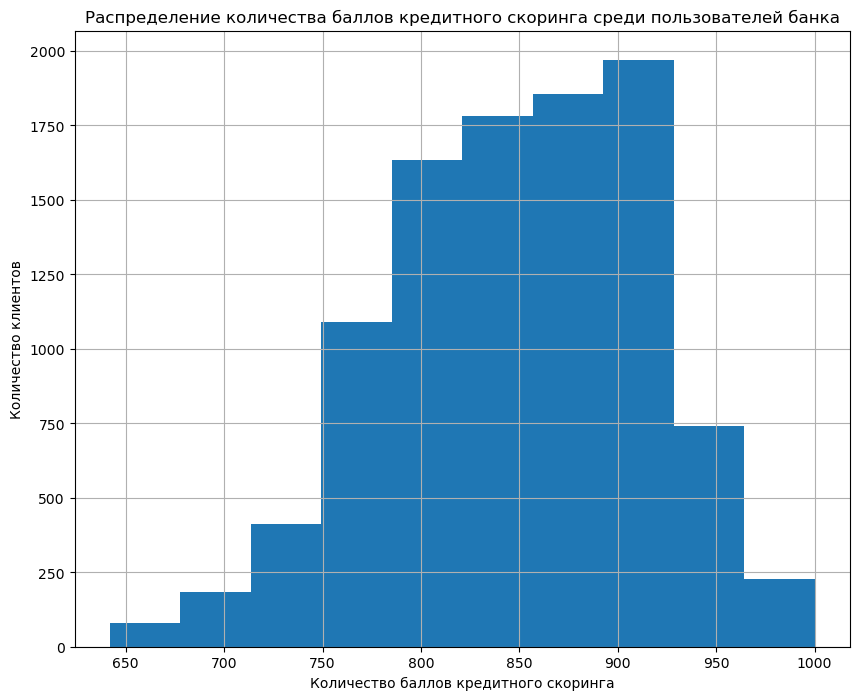

In [43]:
# Построим гистограмму для score
plt.figure(figsize= (10,8))
data['score'].hist()
plt.title('Распределение количества баллов кредитного скоринга среди пользователей банка')
plt.xlabel('Количество баллов кредитного скоринга')
plt.ylabel('Количество клиентов')
plt.show() 

   График показывает распределение количества баллов кредитного скоринга среди пользователей банка. Распределение имеет вид нормального со скошенностью вправо. Большинство клиентов имеют от 850 до 950 баллов.

count    9974.000000
mean      848.682575
std        65.399720
min       642.000000
25%       802.000000
50%       853.000000
75%       900.000000
max      1000.000000
Name: score, dtype: float64

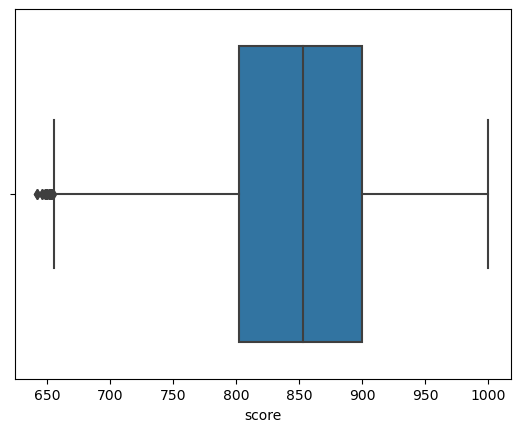

In [44]:
# Построим bpxplot('ящик с усами') для score
sns.boxplot(x = data['score'])  
data['score'].describe() 

   Нижний 'ус' равен 655, верхний ус равен 1000. Среднее значение (848.7) примерно совпадает с медианой набора данных (853) . Разница между третьим и первым квартилем является межквартильным размахом и составляет 98 баллов. Также можно наблюдать выбросы, которые находятся за границей нижнего 'уса'. 

In [45]:
count_city = data['city'].value_counts() 

<Figure size 1000x1000 with 0 Axes>

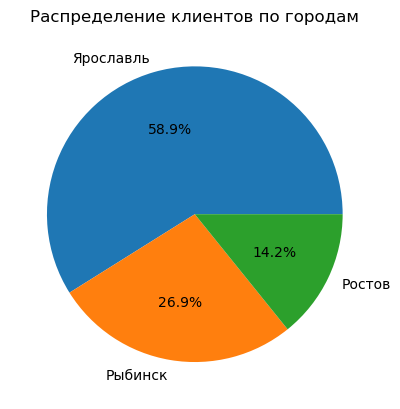

In [46]:
# Построим круговую диаграмму 

plt.figure(figsize= (10,10))
fig, ax = plt.subplots() 

sizes = data['city'].value_counts()
labels = count_city.index
ax.pie(sizes, labels = labels, autopct='%1.1f%%')
ax.set_title('Распределение клиентов по городам')

plt.show() 

   Данные круговой диаграммы показали, что около 59 % клиентов банка находятся в Ярославле, 27 % из Рыбинска и 14 % из Ростова Великого. 

In [47]:
count_gender = data['gender'].value_counts() 

<Figure size 800x800 with 0 Axes>

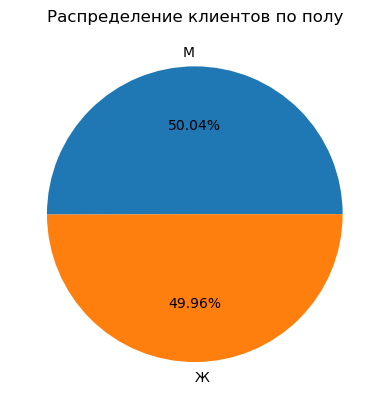

In [48]:
# Построим круговую диаграмму для gender

plt.figure(figsize= (8,8))
fig, ax = plt.subplots() 

sizes = data['gender'].value_counts()
labels = count_gender.index

ax.pie(sizes,labels = labels, autopct='%1.2f%%')
ax.set_title('Распределение клиентов по полу')

plt.show() 



Видим что среди клиентов банка количество мужчин и женщин примерно  одинаково.

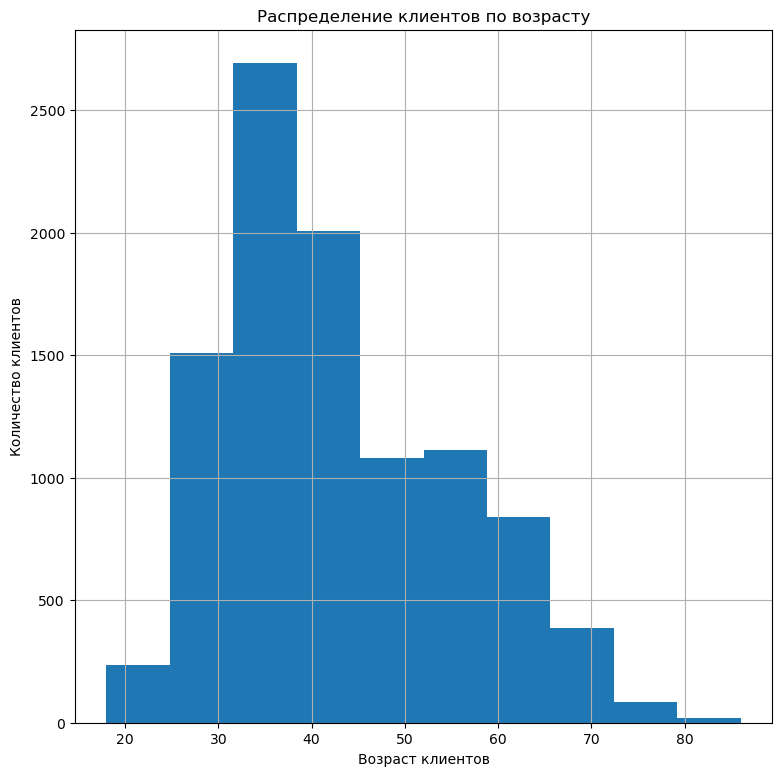

In [49]:
# Построим гистограмму для признака age 

plt.figure(figsize=(9,9))

data['age'].hist()

plt.title('Распределение клиентов по возрасту')
plt.xlabel('Возраст клиентов')
plt.ylabel('Количество клиентов')
plt.show() 

Видим, что пик возраста клиентов приходится на 34 -35 лет. Значения распределены нормально

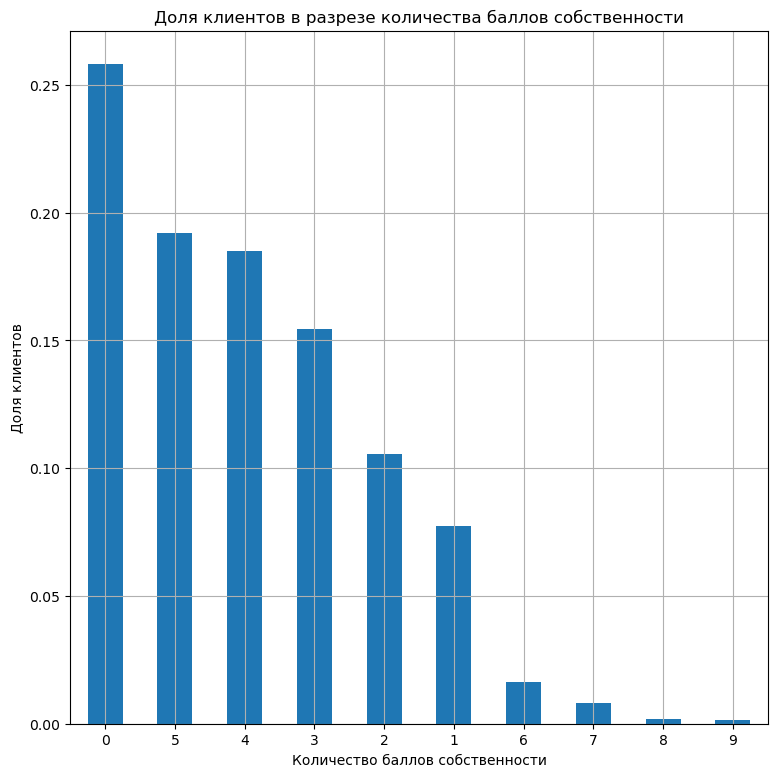

0    0.26
5    0.19
4    0.19
3    0.15
2    0.11
1    0.08
6    0.02
7    0.01
8    0.00
9    0.00
Name: equity, dtype: float64

In [50]:
# Построим столбчатую диаграмму для equity
plt.figure(figsize=(9,9))
data['equity'].value_counts(normalize = True).plot(kind='bar',grid = True)
plt.title('Доля клиентов в разрезе количества баллов собственности')
plt.xlabel('Количество баллов собственности')
plt.xticks(rotation = 'horizontal')
plt.ylabel('Доля клиентов') 
plt.show() 

data['equity'].value_counts(normalize = True).round(2) 

   Исходя из графика, видим, что у 26 % клиента банка нет баллов собственности, примерно у 19 % клиентов - 5 баллов, у 18.5 % - 4 балла, у 15 % - 3 балла, 10 % клиентов банка имеют 2 балла собственности , у 8 % процентов - 1 балл, у 2 % клиентов по 6 баллов собственности. По 7, 8 и 9 баллов собственности имеют примерно одинаковое количество клиентов банка 

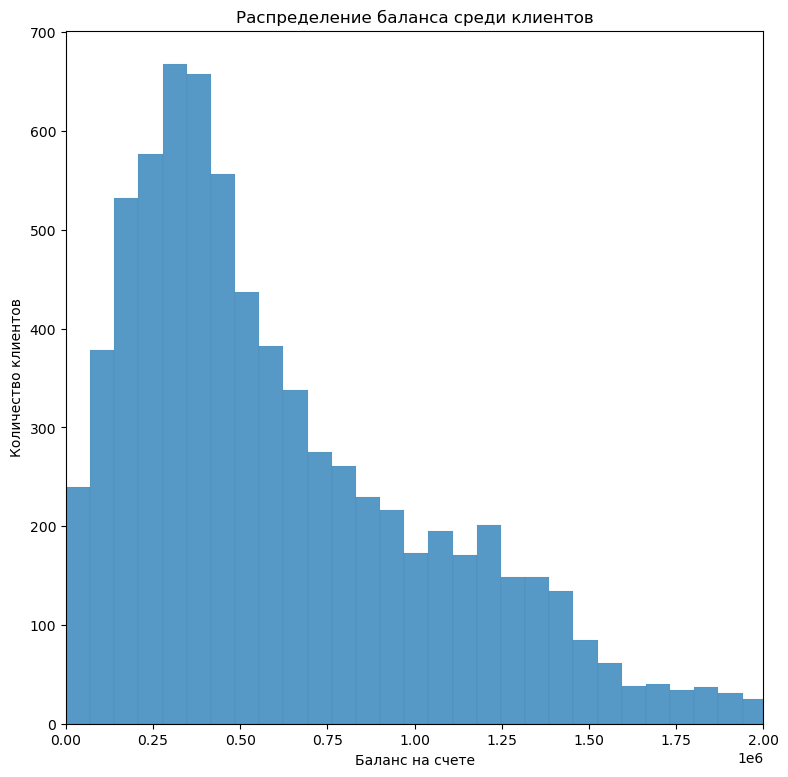

In [51]:
# Построим гистограмму для  balance 

plt.figure(figsize=(9,9))
sns.histplot(data['balance'])
plt.title('Распределение баланса среди клиентов')
plt.xlabel('Баланс на счете')
plt.ylabel('Количество клиентов')
plt.xlim(0,2000000)
plt.show() 





Гистограмма не имеет вид нормального распределения. Есть аномальные выбросы в сторону больших значений.

count    7.695000e+03
mean     8.272456e+05
std      1.980327e+06
min      0.000000e+00
25%      2.956987e+05
50%      5.242953e+05
75%      9.800512e+05
max      1.191136e+08
Name: balance, dtype: float64

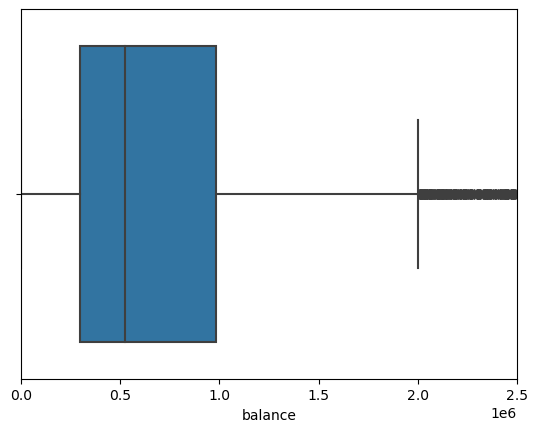

In [52]:
sns.boxplot(x= data['balance'])
plt.xlim(0,2500000)

data['balance'].describe()

   Среднее значение равно 827245.59,  медиана равна 524295.33, межквартильный размах равен ( 980051.215 -  295698.715) = 684352.5. Все что не попало в границы нижнего и верхнего усов, можно считать аномальными значениями(выбросами) 

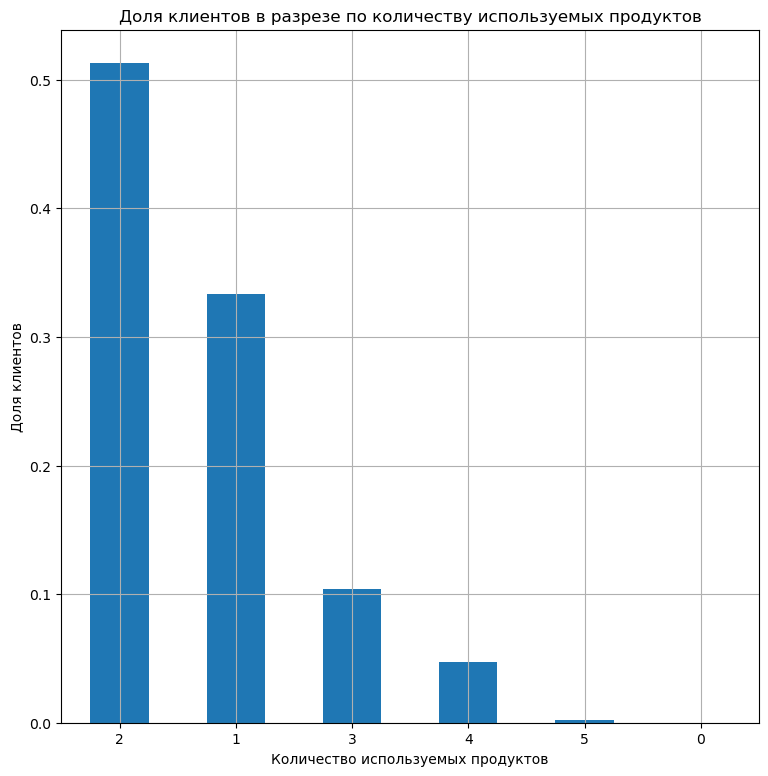

2    5119
1    3323
3    1038
4     474
5      19
0       1
Name: products, dtype: int64

In [53]:
# Построим столбчатую диаграмму для products
plt.figure(figsize=(9,9))
data['products'].value_counts(normalize = True).plot(kind='bar',grid = True)
plt.title('Доля клиентов в разрезе по количеству используемых продуктов')
plt.xlabel('Количество используемых продуктов')
plt.ylabel('Доля клиентов')
plt.xticks(rotation = 'horizontal')
plt.show() 
data['products'].value_counts() 

   Среди клиентов банка есть 1 человек, который не пользуется никакими банковскими продуктами. 5119 клиентов пользуются 2 продуктами, 1 банковским продуктом пользуются 3323 пользователя, 3 продуктами пользуются 1038 клиентов, 474 клиента используют 4 продукта и 19 клиентов пользуются 5 банковскими продуктами 

In [54]:
credit_card_count = data['credit_card'].value_counts()


<Figure size 900x900 with 0 Axes>

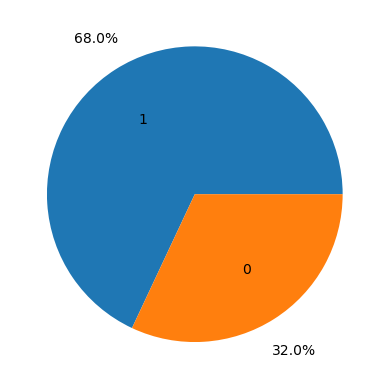

In [55]:
# Построим гистограмму распределения по столбцу credit_card  

plt.figure(figsize=(9,9))
fig, ax = plt.subplots() 

sizes = data['credit_card'].value_counts()
labels = credit_card_count.index
ax.pie(sizes, labels = labels, autopct = '%1.1f%%',   pctdistance=1.25, labeldistance=.6) 

plt.show()

У 68 % клиентов банка есть кредитная карта, а 32 % клиентов не имеют кредитной карты

In [56]:
count_last_activity = data['last_activity'].value_counts() 

<Figure size 900x900 with 0 Axes>

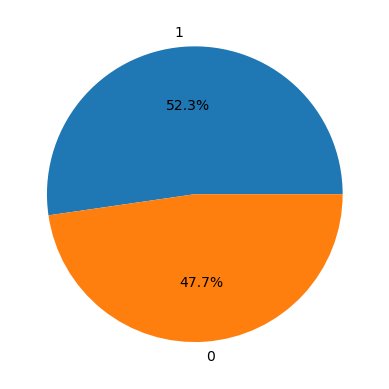

In [57]:
# Построим гистограмму распределения по столбцу last_activity 

plt.figure(figsize=(9,9))

fig, ax = plt.subplots() 

labels = count_last_activity.index
sizes = data['last_activity'].value_counts()

ax.pie(sizes, labels = labels, autopct = '%1.1f%%') 

plt.show()


Соотношение активных и неактивных клиентов как можно заметить распределилось практически поровну: 52.3 % на 47.7 %

In [58]:
# Посчитаем 99 перцентиль для est_salary
np.percentile(data['est_salary'], 99)

886322.5299000009

99 % значений меньше 886322.5 рублей

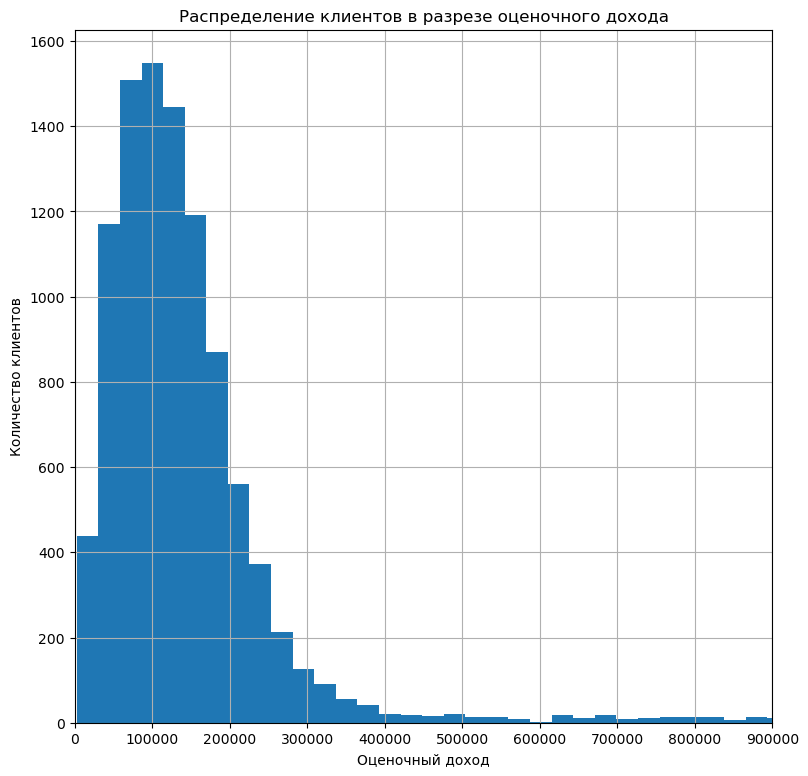

In [59]:
# Построим гистограмму распределения для est_salary

plt.figure(figsize=(9,9)) 
data['est_salary'].hist(bins = 50)
plt.title('Распределение клиентов в разрезе оценочного дохода')
plt.xlim(0,900000)
plt.xlabel('Оценочный доход')
plt.ylabel('Количество клиентов')
plt.show() 



Гистограмма не имеет вид нормального распределения, есть аномальные значения выше 300000 рублей. В среднем оценочный доход клиента равен 100000 рублей.

count    9.974000e+03
mean     1.477868e+05
std      1.392855e+05
min      2.546300e+03
25%      7.525166e+04
50%      1.196268e+05
75%      1.744998e+05
max      1.395064e+06
Name: est_salary, dtype: float64

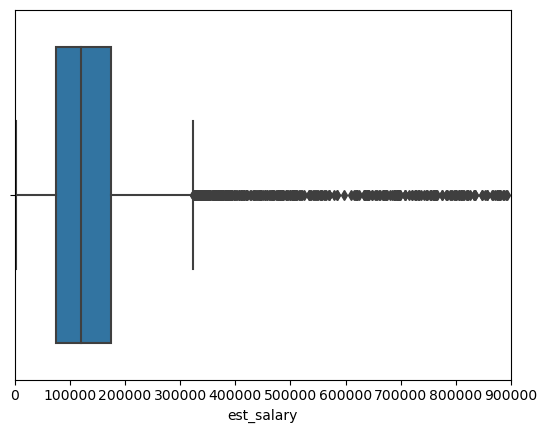

In [60]:
sns.boxplot(x = data['est_salary'])
plt.xlim(0,900000)
data['est_salary'].describe()

Среднее значение оценочного дохода равно 147787 рублей, медиана равна 119627 рублей. Первый квартиль равен  75251.66 рублей, третий квартиль равен  174500 рублей, межквартильный размах равняется 99284.34 рублей. Верхний 'ус' примерно находится в районе 300000 рублей. Все, что лежит за пределами верхнего 'уса' можно считать выбросами.

In [61]:
churn_count = data['churn'].value_counts() 

<Figure size 900x900 with 0 Axes>

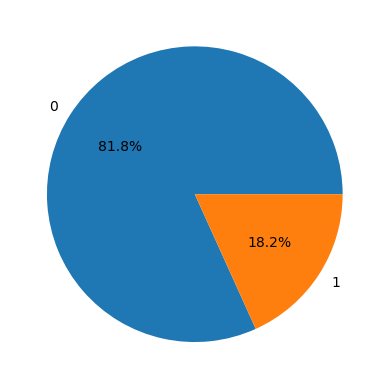

In [62]:
# Построим гистограмму по признаку churn 


plt.figure(figsize=(9,9))
fig, ax = plt.subplots() 

labels = churn_count.index
sizes = data['churn'].value_counts()

ax.pie(sizes, labels = labels, autopct = '%1.1f%%') 

plt.show()

Видим, что среди клиентов банка в большинстве преобладают действующие клиенты, которые не собираются уходить(81.8 %). Отточными клиентами можно считать 18.2 % клиентов 

In [63]:
print('Доля отточных клиентов:', "{0:.2f}".format(data['churn'].mean()), '%')
print('Доля действующих клиентов:', "{0:.2f}".format(1 -data['churn'].mean()), '%')


Доля отточных клиентов: 0.18 %
Доля действующих клиентов: 0.82 %


Посмотрим как распределились признаки относительно признака оттока (churn)

In [64]:
data.groupby('churn').agg('mean').round(2)

C:\Users\user\AppData\Local\Temp\ipykernel_5344\1620309678.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('churn').agg('mean').round(2)


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,balance_nan,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
churn,,,,,,,,,,,,,,,
0,171928.11,845.40,43.02,2.38,733031.63,1.76,0.71,0.48,147674.64,0.72,0.14,0.28,0.58,0.53,0.47
1,170980.10,863.42,41.45,3.76,1134458.21,2.38,0.55,0.70,148289.70,0.99,0.15,0.24,0.61,0.35,0.65


   В таблице средних значений можно  заметить, что среди клиентов, которые покидают банк, больше мужчин, чем женщин(65 % против 35 %).  Клиенты в Ярославле с большей вероятностью уходят из банка, чем клиенты из Ростова Великого и Рыбинска. Клиенты с балансом более 1000000 рублей проявляют большее желание покинуть банк, чем клиенты с балансом до 1000000 рублей. При этом, количество баллов собственности, возраст, количество баллов кредитного скоринга, количество используемых продуктов, наличие кредитной карты и оценочный доход среди двух групп различаются несильно.
    

 Посмотрим на распределение признаков относительно признака churn

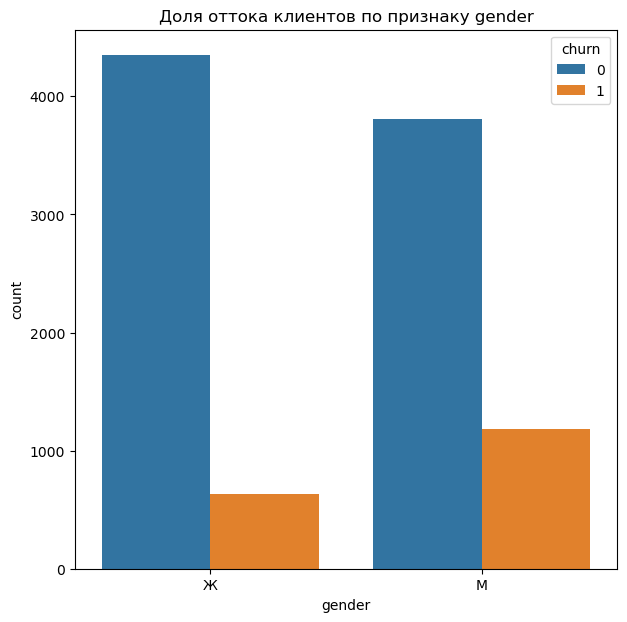

In [65]:
plt.figure(figsize=(7,7))
           
sns.countplot(data = data, x = 'gender', hue = 'churn') 
plt.title('Доля оттока клиентов по признаку gender')
plt.show()

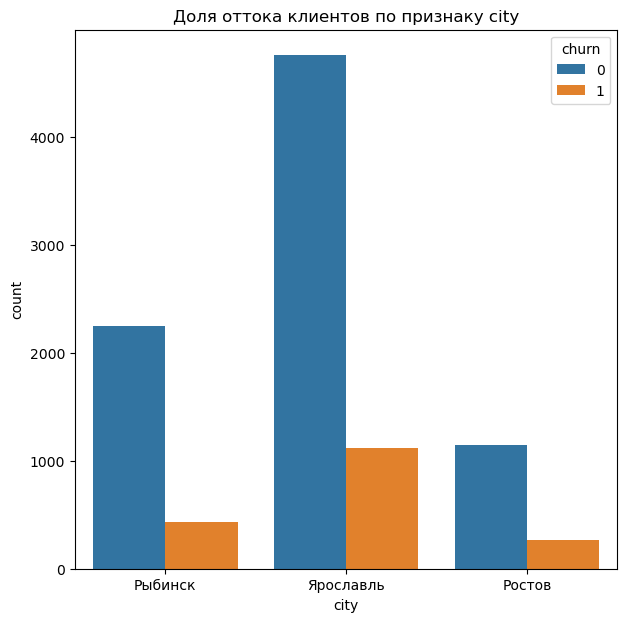

In [66]:
plt.figure(figsize=(7,7))
           
sns.countplot(data = data, x = 'city', hue = 'churn') 
plt.title('Доля оттока клиентов по признаку city')
plt.show()

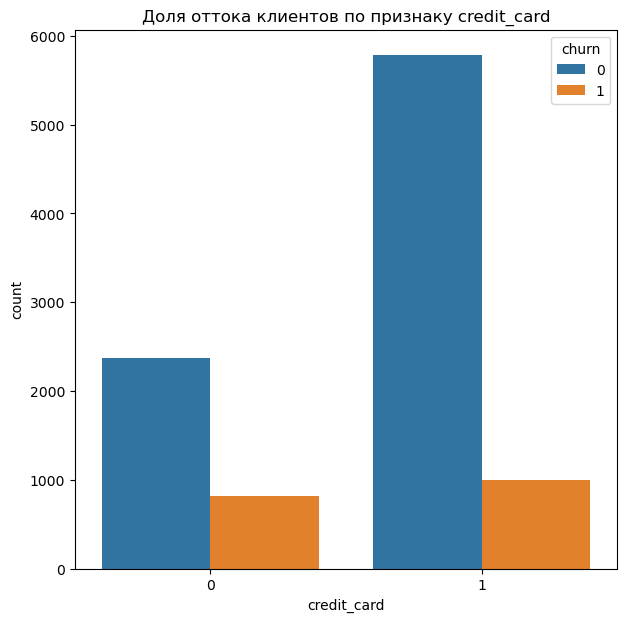

In [67]:
plt.figure(figsize=(7,7))
           
sns.countplot(data = data, x = 'credit_card', hue = 'churn') 
plt.title('Доля оттока клиентов по признаку credit_card')
plt.show()

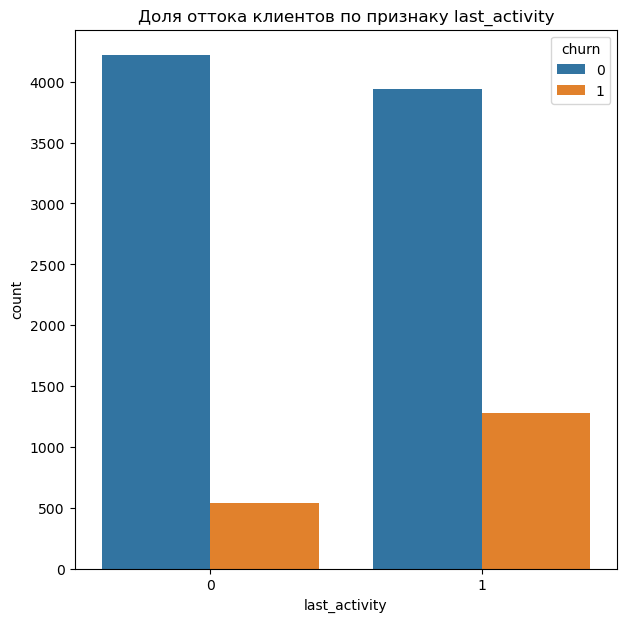

In [68]:
plt.figure(figsize=(7,7))
           
sns.countplot(data = data, x = 'last_activity', hue = 'churn') 
plt.title('Доля оттока клиентов по признаку last_activity')
plt.show()

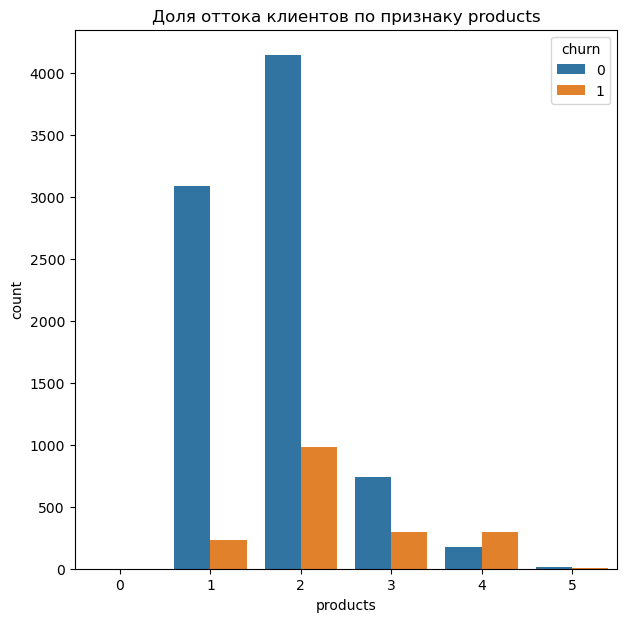

In [69]:
plt.figure(figsize=(7,7))
           
sns.countplot(data = data, x = 'products', hue = 'churn') 
plt.title('Доля оттока клиентов по признаку products')
plt.show()

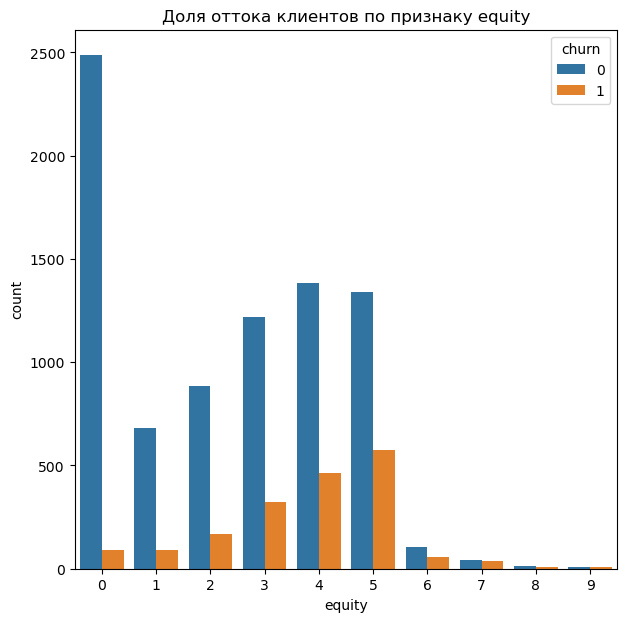

In [70]:
plt.figure(figsize=(7,7))
           
sns.countplot(data = data, x = 'equity', hue = 'churn') 
plt.title('Доля оттока клиентов по признаку equity')
plt.show()

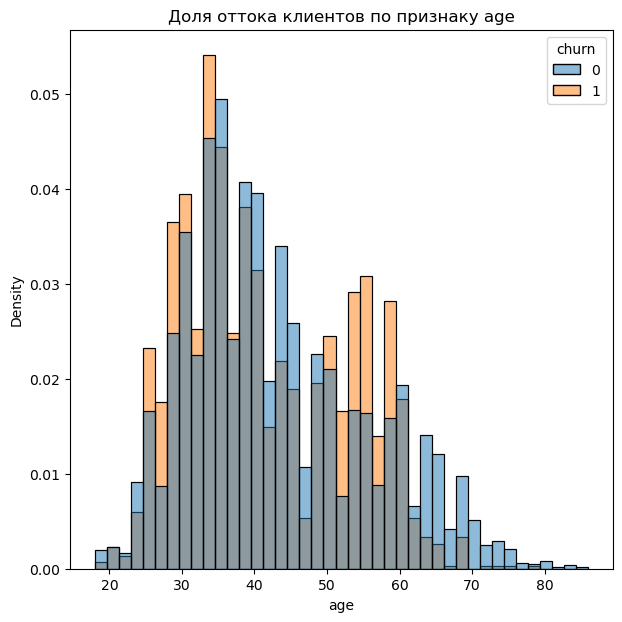

In [71]:
plt.figure(figsize=(7,7))
           
sns.histplot(data = data, x = 'age', hue = 'churn', common_norm = False, stat = 'density')
plt.title('Доля оттока клиентов по признаку age')
plt.show()

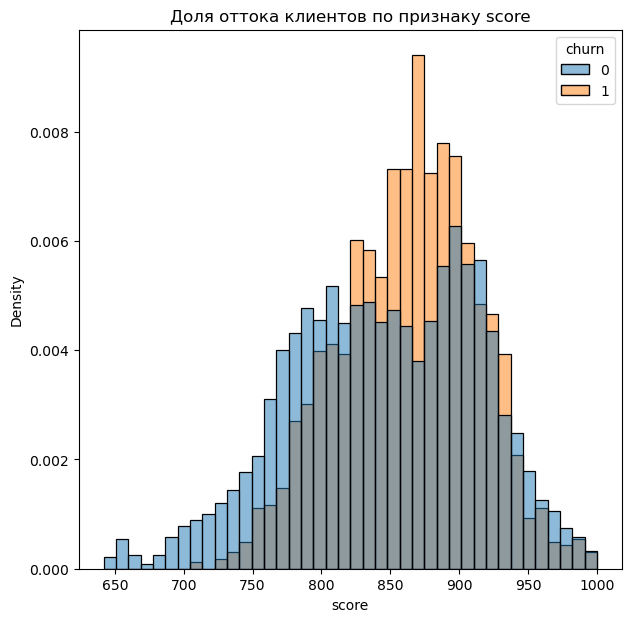

In [72]:
plt.figure(figsize=(7,7))
           
sns.histplot(data = data, x = 'score', hue = 'churn', common_norm = False, stat = 'density')
plt.title('Доля оттока клиентов по признаку score')
plt.show()

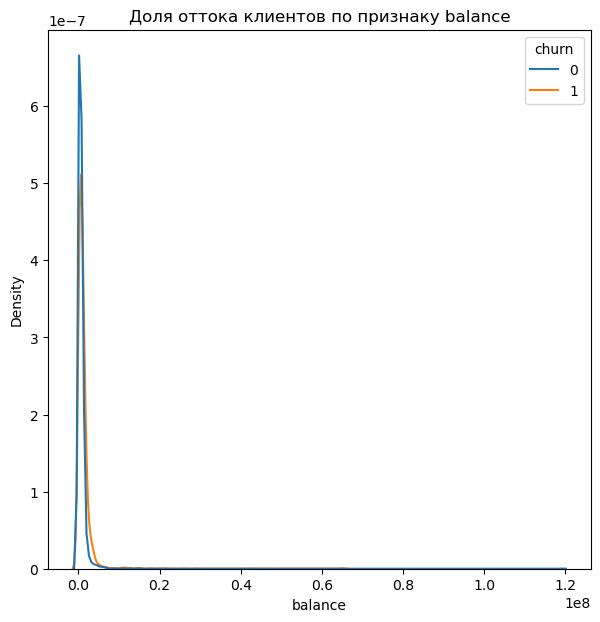

In [73]:
plt.figure(figsize=(7,7))
           
sns.kdeplot(data = data, x = 'balance', hue = 'churn', common_norm = False)
plt.title('Доля оттока клиентов по признаку balance')
plt.show()

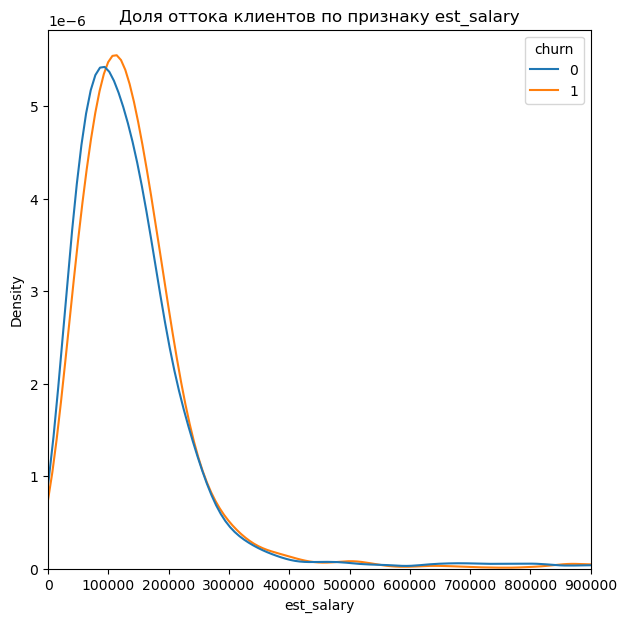

In [74]:
plt.figure(figsize=(7,7))
           
sns.kdeplot(data = data, x = 'est_salary', hue = 'churn', common_norm = False)
plt.title('Доля оттока клиентов по признаку est_salary')
plt.xlim(0,900000)
plt.show()

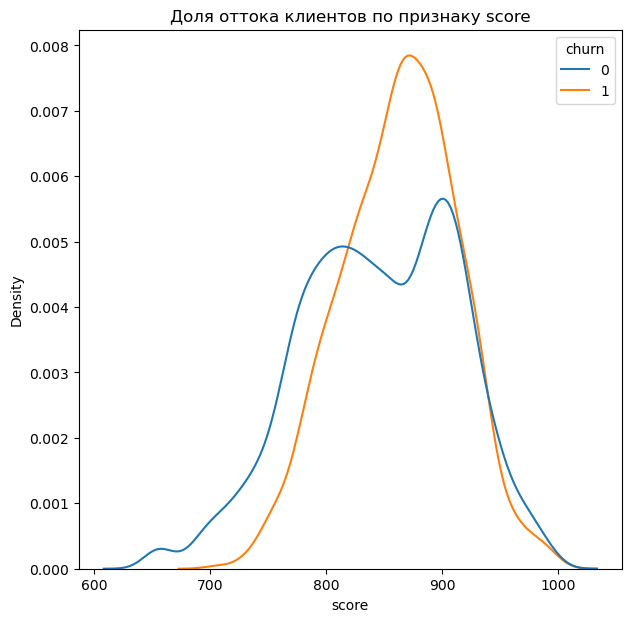

In [75]:
plt.figure(figsize=(7,7))
           
sns.kdeplot(data = data, x = 'score', hue = 'churn', common_norm = False)
plt.title('Доля оттока клиентов по признаку score')
plt.show()

Проведенный анализ оттока клиентов по разным признакам позволяет сделать следующие выводы: 
 * мужчины чаще женщин покидают банк;
 * клиенты из Ярославля с большей вероятностью уходяи из банка, чем клиенты из Рыбинска и Ростова Великого;
 * наличие либо отсутсвие кредитной карты никаким образом не отражается на желании клиенты покинуть банк;
 * активные клиенты проявляют лояльность и не собираются уходить из банка;
 * клиенты с 2,3 и 4 продуктами хотят покинуть банк больше, в то время как клиенты, использующие  1 и 5 продуктов остаются чаще в банке 
 * Наиболее склонны к уходу клиенты от 50 до 60 лет, в то время каак клиентыот 30 до 50 лет склонны оставаться в банке обслуживания 
 * Количество баллов кредитного скоринга, остаток на балансе и оценочный доход слабо влияют на склонность клиентов к оттоку

 Посмотрим на распределение признаков относительно города, в котором обслуживается тот или иной клиент

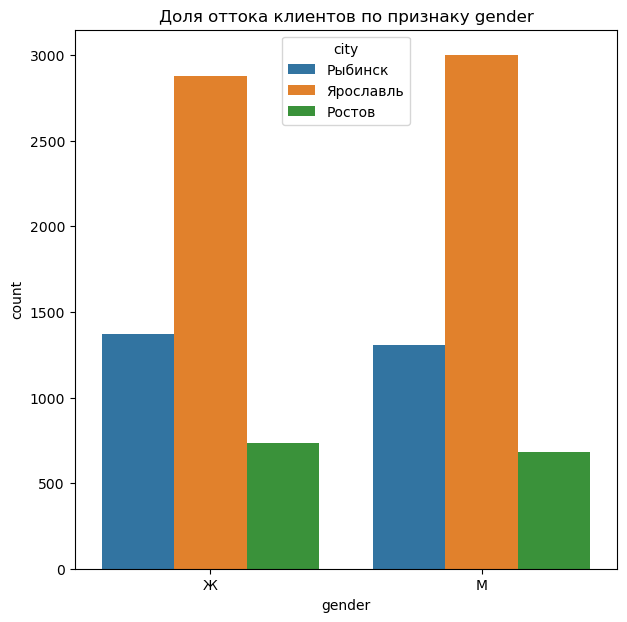

In [76]:
plt.figure(figsize=(7,7))
           
sns.countplot(data = data, x = 'gender', hue = 'city') 
plt.title('Доля оттока клиентов по признаку gender')
plt.show()

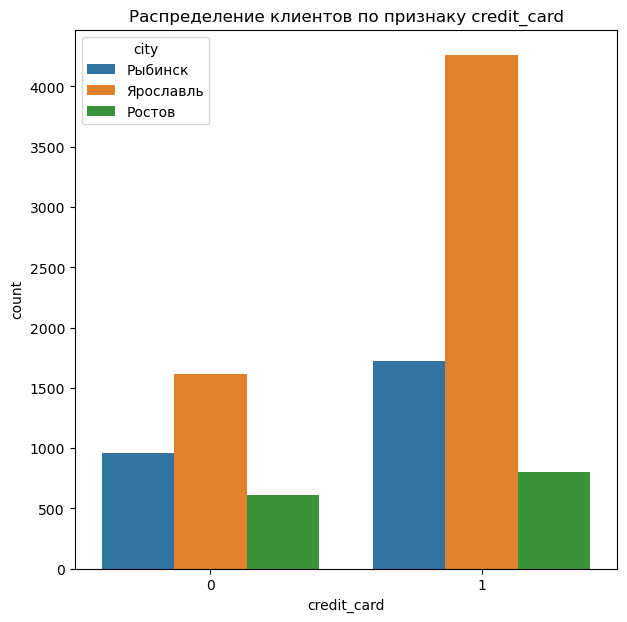

In [77]:
plt.figure(figsize=(7,7))
           
sns.countplot(data = data, x = 'credit_card', hue = 'city') 
plt.title('Распределение клиентов по признаку credit_card')
plt.show() 

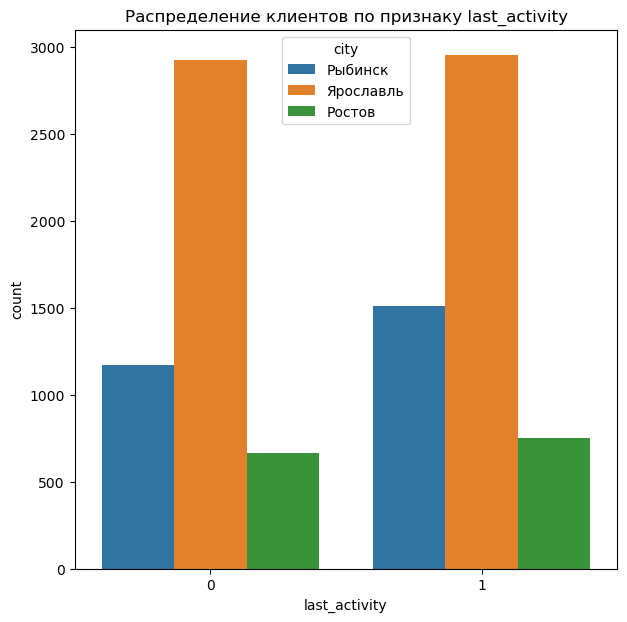

In [78]:
plt.figure(figsize=(7,7))
           
sns.countplot(data = data, x = 'last_activity', hue = 'city') 
plt.title('Распределение клиентов по признаку last_activity')
plt.show() 

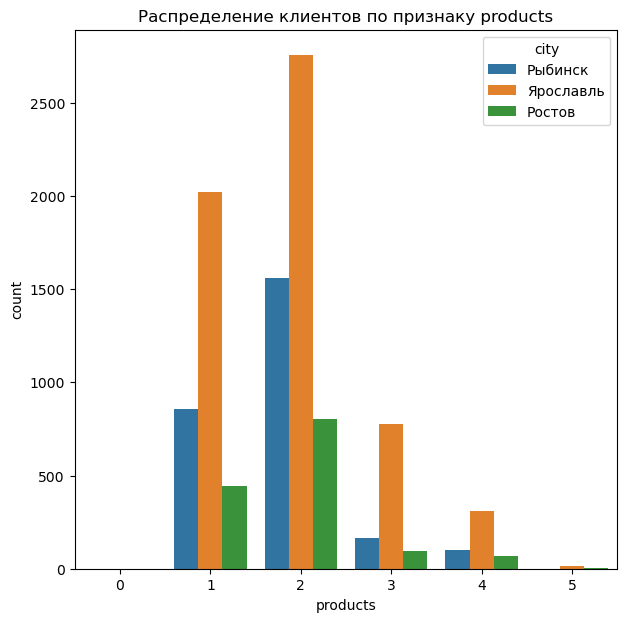

In [79]:
plt.figure(figsize=(7,7))          
sns.countplot(data = data, x = 'products', hue = 'city') 
plt.title('Распределение клиентов по признаку products')
plt.show() 

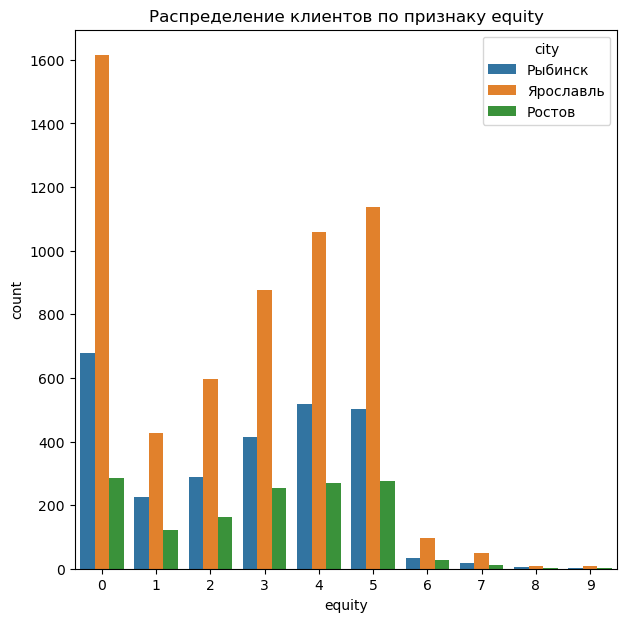

In [80]:
plt.figure(figsize=(7,7))    
sns.countplot(data = data, x = 'equity', hue = 'city') 
plt.title('Распределение клиентов по признаку equity')
plt.show() 

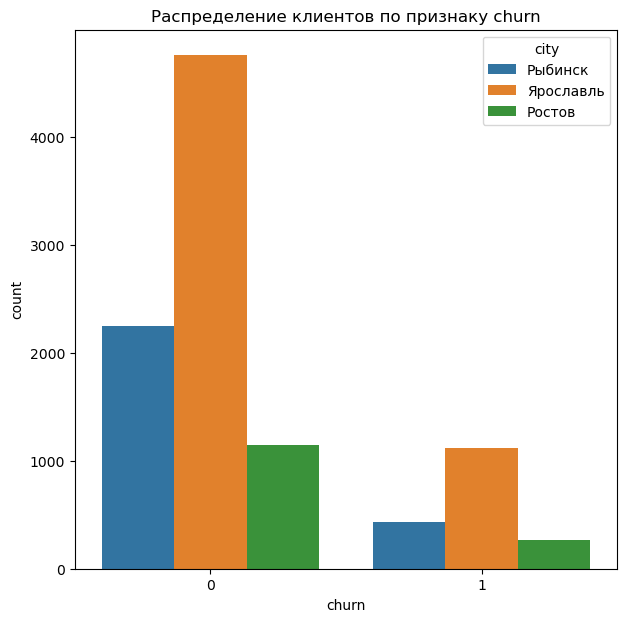

In [81]:
plt.figure(figsize=(7,7))          
sns.countplot(data = data, x = 'churn', hue = 'city') 
plt.title('Распределение клиентов по признаку churn')
plt.show() 

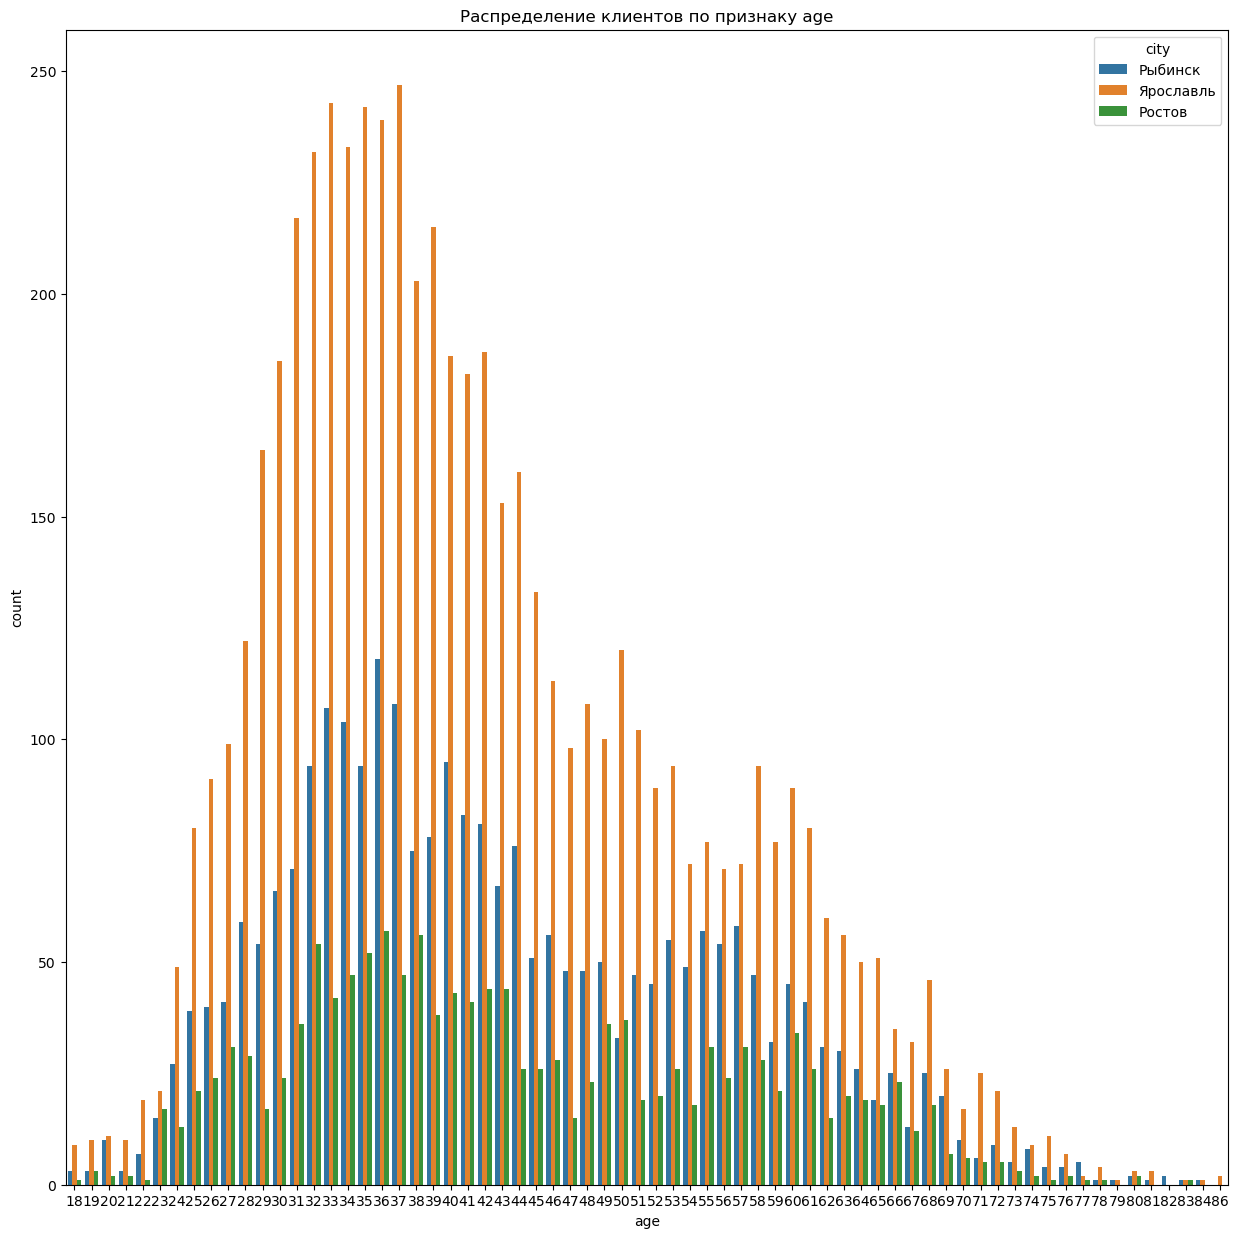

In [82]:
plt.figure(figsize=(15,15))       
sns.countplot(data = data, x = 'age', hue = 'city')
plt.title('Распределение клиентов по признаку age') 
plt.show() 

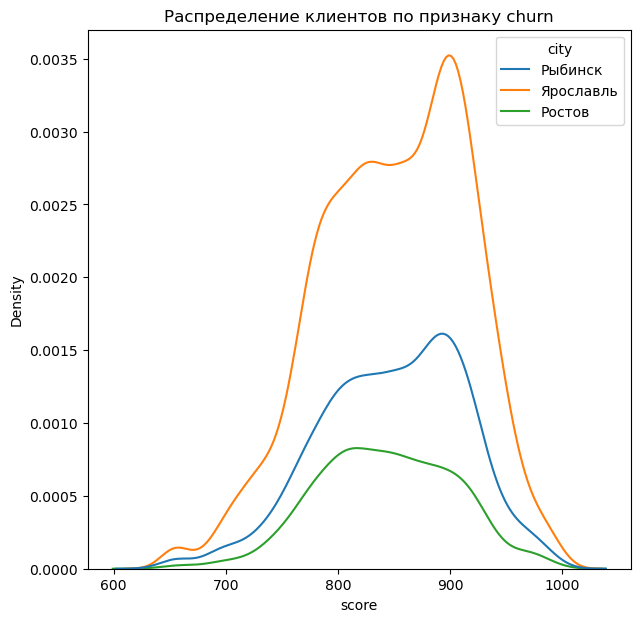

In [83]:
plt.figure(figsize=(7,7))          
sns.kdeplot(data = data, x = 'score', hue = 'city', common_norm = 'False')
plt.title('Распределение клиентов по признаку churn')
plt.show() 

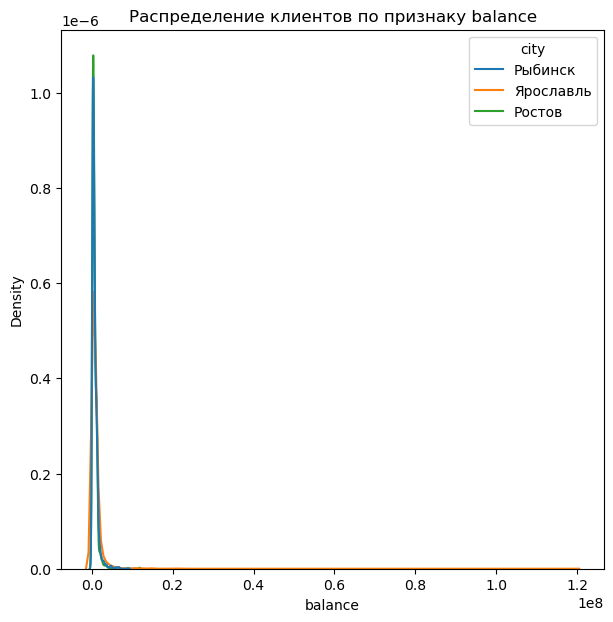

In [84]:
plt.figure(figsize=(7,7))          
sns.kdeplot(data = data, x = 'balance', hue = 'city', common_norm = False) 
plt.title('Распределение клиентов по признаку balance')
plt.show() 

Проведенный анализ филиала обслуживания клиентов  по разным признакам позволяет сделать следующие выводы: 
 * в абсолютном и в относительном выражении количество клиентов из Ярославля выше, чем в Ростове Великом и Рыбинске; 
 * Распределение мужчин и женщин в трех городах одинаковое
 * Активных клиентов больше чем неактивных во всех трех городах 
 * Клиентов, пользующихся кредитной картой больше, чем клиентов, не пользующихся ей 
 * Количество баллов кредитного скоринга, возраст, остаток на балансе и оценочный доход распределены одинаково во всех филиалах обслуживания 
 

Посмотрим на распределение признаков относительно пола клиента 

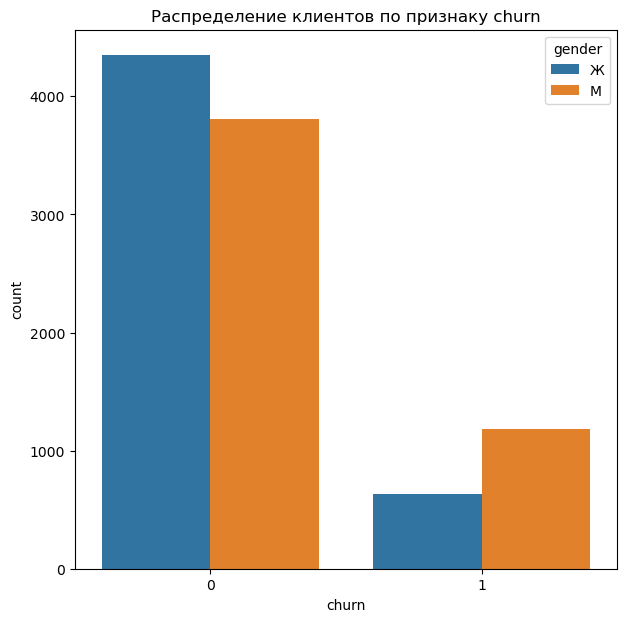

In [85]:
plt.figure(figsize=(7,7))          
sns.countplot(data = data, x = 'churn', hue = 'gender') 
plt.title('Распределение клиентов по признаку churn')
plt.show()

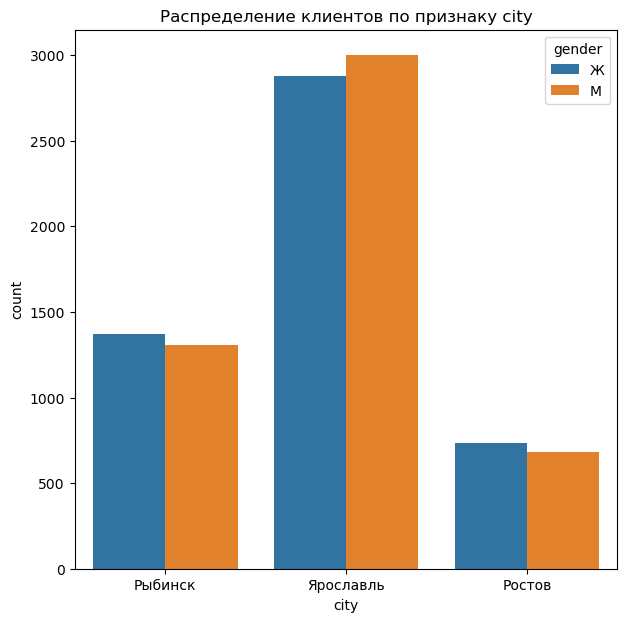

In [86]:
plt.figure(figsize=(7,7))          
sns.countplot(data = data, x = 'city', hue = 'gender') 
plt.title('Распределение клиентов по признаку city')
plt.show()

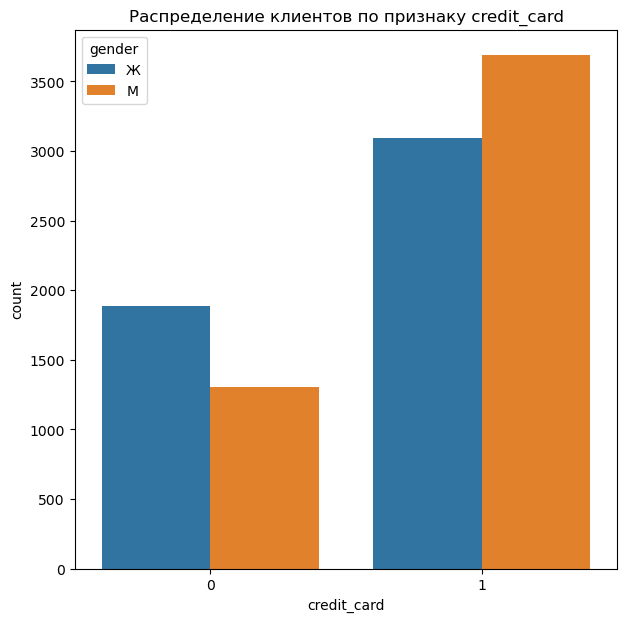

In [87]:
plt.figure(figsize=(7,7))          
sns.countplot(data = data, x = 'credit_card', hue = 'gender') 
plt.title('Распределение клиентов по признаку credit_card')
plt.show()

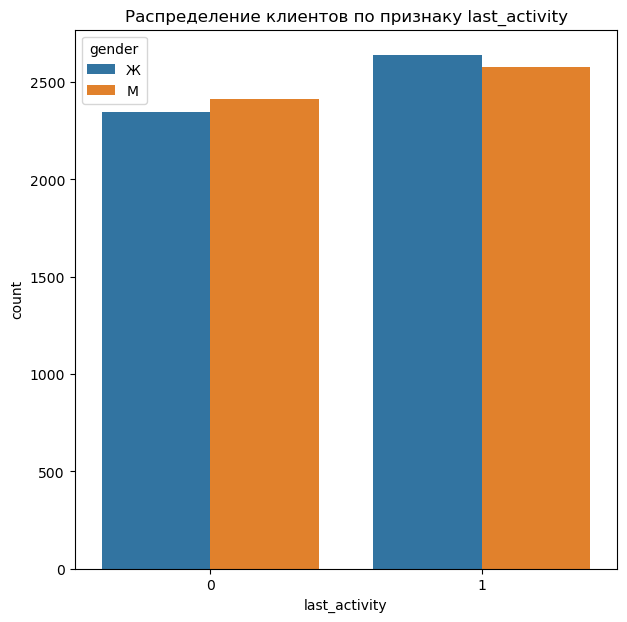

In [88]:
plt.figure(figsize=(7,7))          
sns.countplot(data = data, x = 'last_activity', hue = 'gender') 
plt.title('Распределение клиентов по признаку last_activity')
plt.show()

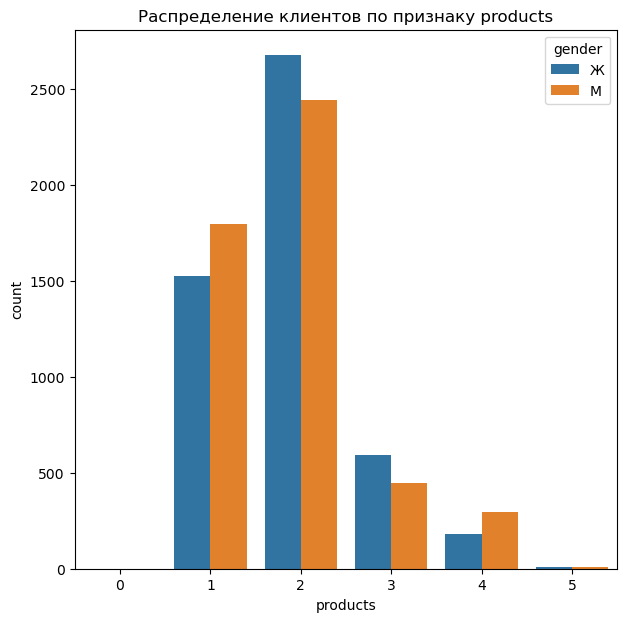

In [89]:
plt.figure(figsize=(7,7))          
sns.countplot(data = data, x = 'products', hue = 'gender') 
plt.title('Распределение клиентов по признаку products')
plt.show()

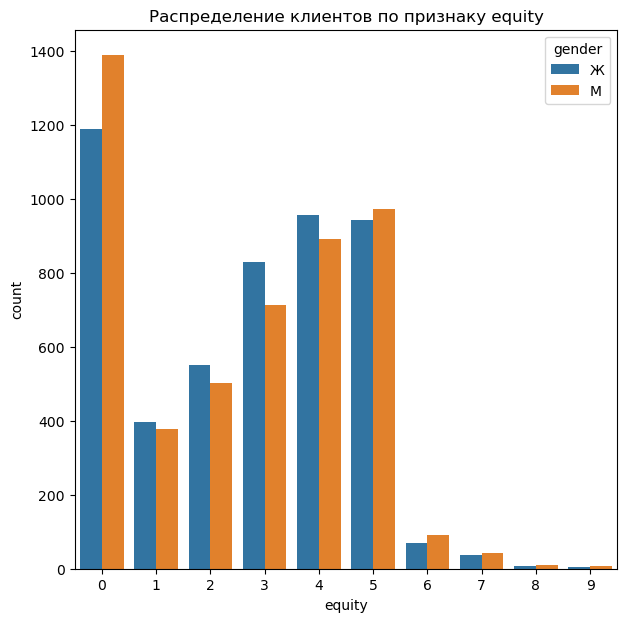

In [90]:
plt.figure(figsize=(7,7))          
sns.countplot(data = data, x = 'equity', hue = 'gender') 
plt.title('Распределение клиентов по признаку equity')
plt.show()

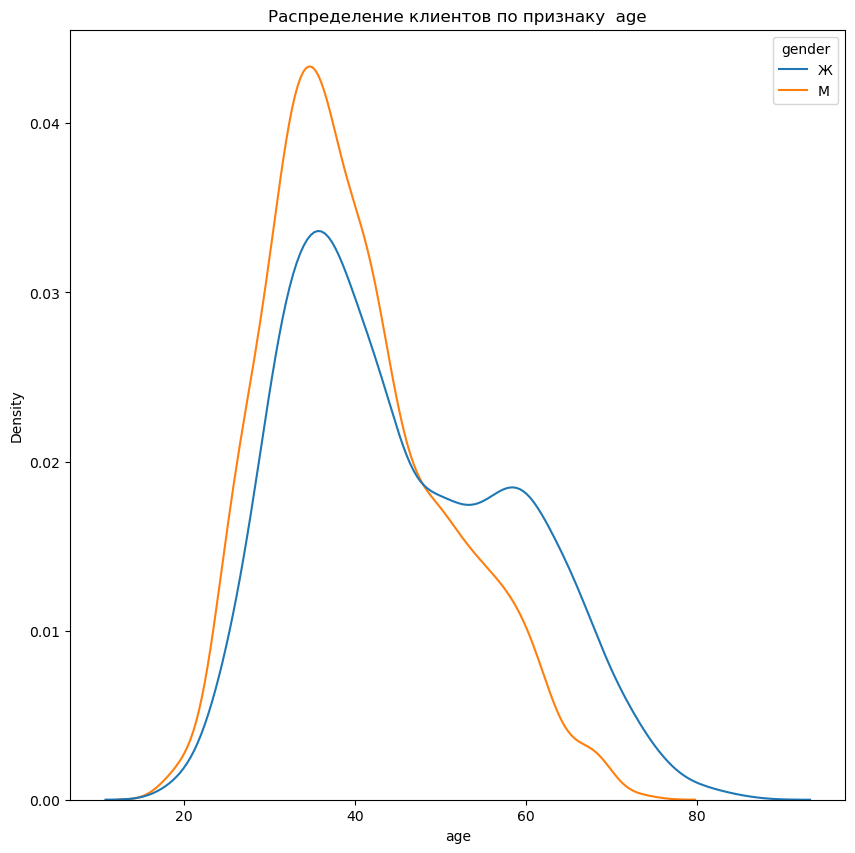

In [91]:
plt.figure(figsize=(10,10))          
sns.kdeplot(data = data, x = 'age', hue = 'gender', common_norm = False) 
plt.title('Распределение клиентов по признаку  age')
plt.show()

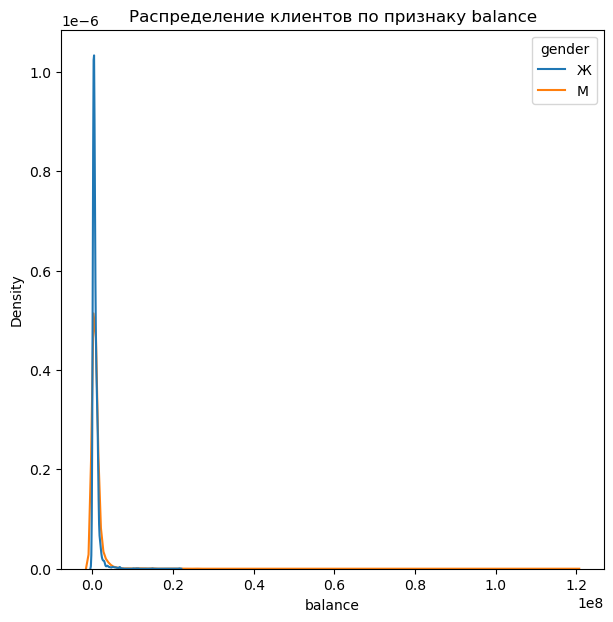

In [92]:
plt.figure(figsize=(7,7))          
sns.kdeplot(data = data, x = 'balance', hue = 'gender', common_norm = False)
plt.title('Распределение клиентов по признаку balance')
plt.show()

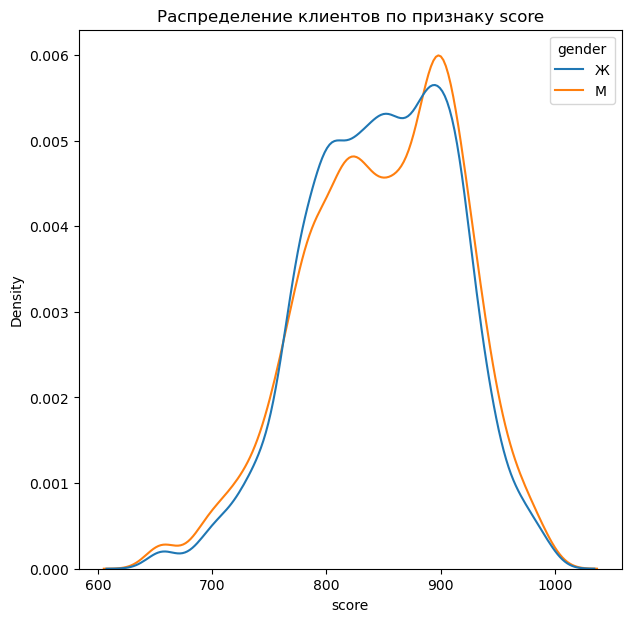

In [93]:
plt.figure(figsize=(7,7))          
sns.kdeplot(data = data, x = 'score', hue = 'gender', common_norm = False)
plt.title('Распределение клиентов по признаку score')
plt.show()

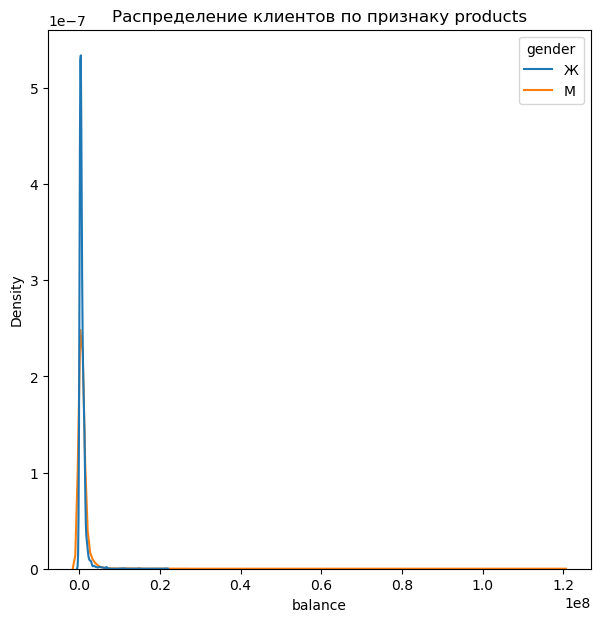

In [94]:
plt.figure(figsize=(7,7))          
sns.kdeplot(data = data, x = 'balance', hue = 'gender') 
plt.title('Распределение клиентов по признаку products')
plt.show()

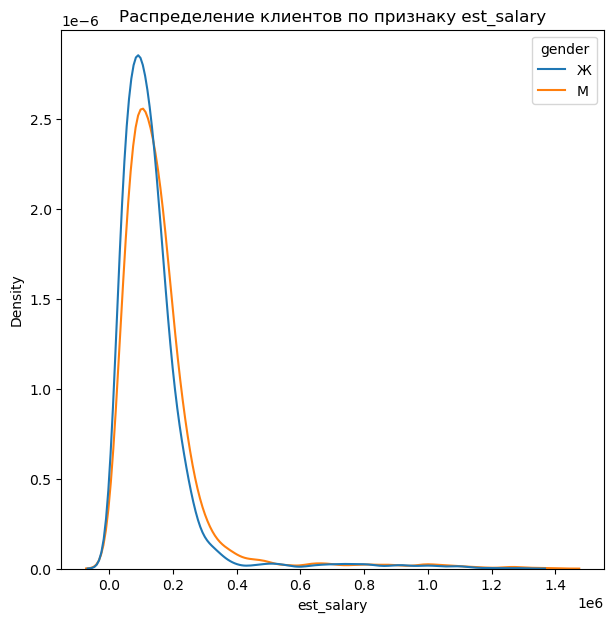

In [95]:
plt.figure(figsize=(7,7))          
sns.kdeplot(data = data, x = 'est_salary', hue = 'gender') 
plt.title('Распределение клиентов по признаку est_salary')
plt.show()

   Проведенный анализ пола клиентов  по разным признакам позволяет сделать следующие выводы: 
 * в абсолютном и в относительном выражении количество мукжчин и женщин одинаковое;
 * вероятность оттока среди мужчин выше чум у женщин, женщины чаще мужчин предпочитают оставаться в банке; 
 * В Ярославле обслуживается больше мужчин, чем женщин. В Ростове Великом и Рыбинске обратная ситуация: среди клентов больше мужчин, чем женщин 
 * Мужчины пользуются кредитной картой чаще женщин 
 * Женщины более активные клиенты, чем мужчины 
 * Мужчины пользуются 1 и 4 продуктами банка чаще женщин, в то время как женщины используют 2 и 3 продукта чаще мужчин
 * Не имеют баллов собственности больше мужчины, чем женщины. Среди клиентов, имеющих 1,2,3 и 4 баллов собственности, больше женщин

## 9 2.2 Построение корреляционной матрицы (heatmap) 

In [96]:
data.head(5)

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М,city,gender
0,183012,850.0,25,1,59214.82,2,0,1,75719.14,1,1,0,1,0,1,0,Рыбинск,Ж
1,146556,861.0,37,5,850594.33,3,1,0,86621.77,0,1,0,1,0,1,0,Рыбинск,Ж
2,120722,892.0,30,0,NaN,1,1,1,107683.34,0,0,0,1,0,1,0,Рыбинск,Ж
3,225363,866.0,51,5,1524746.26,2,0,1,174423.53,1,1,0,0,1,1,0,Ярославль,Ж
4,157978,730.0,34,5,174.00,1,1,0,67353.16,1,1,0,0,1,0,1,Ярославль,М


In [97]:
# Переименуем некоторые столбцы 
data   = data.rename(columns = {'city_Ростов': 'city_Rostov', 'city_Рыбинск': 'city_Rybinsk', 
                            'city_Ярославль':'city_Yaroslavl'}) 


In [98]:
# Построим корреляционную матрицу с помощью phik
phik_data = data.phik_matrix()
phik_data

interval columns not set, guessing: ['user_id', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'balance_nan', 'city_Rostov', 'city_Rybinsk', 'city_Yaroslavl', 'gender_Ж', 'gender_М']


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan,city_Rostov,city_Rybinsk,city_Yaroslavl,gender_Ж,gender_М,city,gender
user_id,1.000000,0.064516,0.000000,0.073695,0.034050,0.074612,0.035839,0.066475,0.000000,0.139837,0.041561,0.043424,0.000000,0.000000,0.059462,0.059462,0.032732,0.059462
score,0.064516,1.000000,0.036178,0.527334,0.170887,0.307399,0.208318,0.053418,0.395214,0.228080,0.753723,0.086244,0.028415,0.084318,0.070446,0.070446,0.090925,0.070446
age,0.000000,0.036178,1.000000,0.043708,0.024989,0.133418,0.157196,0.089172,0.358167,0.182538,0.047711,0.068652,0.059167,0.097571,0.286026,0.286026,0.093705,0.286026
equity,0.073695,0.527334,0.043708,1.000000,0.000000,0.441413,0.221467,0.051218,0.285543,0.352103,0.975565,0.064355,0.000000,0.055061,0.063699,0.063699,0.062559,0.063699
balance,0.034050,0.170887,0.024989,0.000000,1.000000,0.000000,0.000000,0.000000,0.374366,0.024672,NaN,0.000000,0.023165,0.047918,0.045434,0.045434,0.039931,0.045434
products,0.074612,0.307399,0.133418,0.441413,0.000000,1.000000,0.459117,0.191921,0.157477,0.440923,0.791714,0.075397,0.146192,0.184518,0.122023,0.122023,0.223196,0.122023
credit_card,0.035839,0.208318,0.157196,0.221467,0.000000,0.459117,1.000000,0.049306,0.038496,0.202374,0.244231,0.152065,0.077070,0.178519,0.195831,0.195831,0.074660,0.195831
last_activity,0.066475,0.053418,0.089172,0.051218,0.000000,0.191921,0.049306,1.000000,0.044890,0.262164,0.041335,0.000000,0.074134,0.074753,0.012733,0.012733,0.030399,0.012733
est_salary,0.000000,0.395214,0.358167,0.285543,0.374366,0.157477,0.038496,0.044890,1.000000,0.048803,0.429635,0.135878,0.101303,0.175599,0.144090,0.144090,0.170948,0.144090
churn,0.139837,0.228080,0.182538,0.352103,0.024672,0.440923,0.202374,0.262164,0.048803,1.000000,0.380486,0.000000,0.044966,0.033865,0.219731,0.219731,0.016431,0.219731


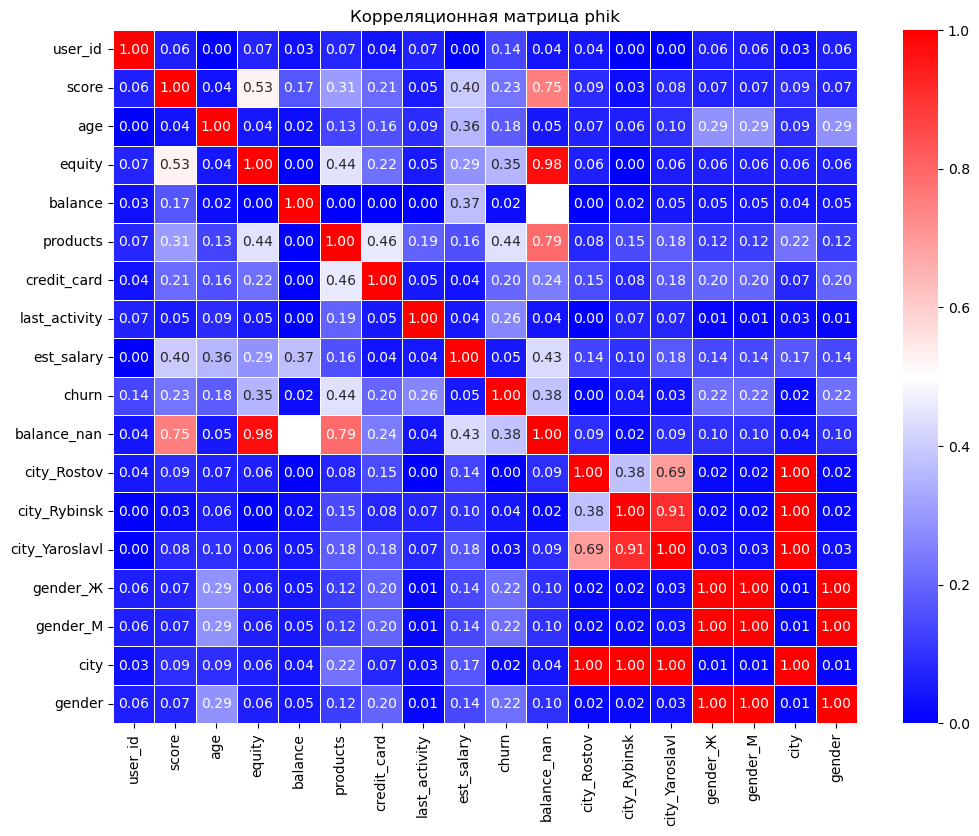

In [99]:
# Построим тепловую карту 
plt.figure(figsize = (12,9))
sns.heatmap(phik_data, annot = True, fmt = '.2f', cmap = 'bwr', linewidth = .5)
plt.title('Корреляционная матрица phik')
plt.show()  


Данные корреляционной матрицы phik позволяют сделать следующие выводы: 

*  На отточность клиентов влияют количество используемых продуктов (0.44), количество баллов собственности (0.35). Также есть положительная слабая связь между отточностью клиентов churn и активностью в последнее время (0.26), количеством баллов кредитного скоринга (0.23) и наличием /отсутствием кредитной карты(0.20) 
*  Количество используемых продуктов коррелирует положительно с баллами кредитного скоринга (0.31), с количеством баллов собственности (0.44), с наличием/отсутствием кредитной карты(0.46) 
* Между активностью клиентов и отточностью есть слабая положительная связь (0.26), также есть зависимость активности с количеством используемых продуктов клиентами (0.19) 

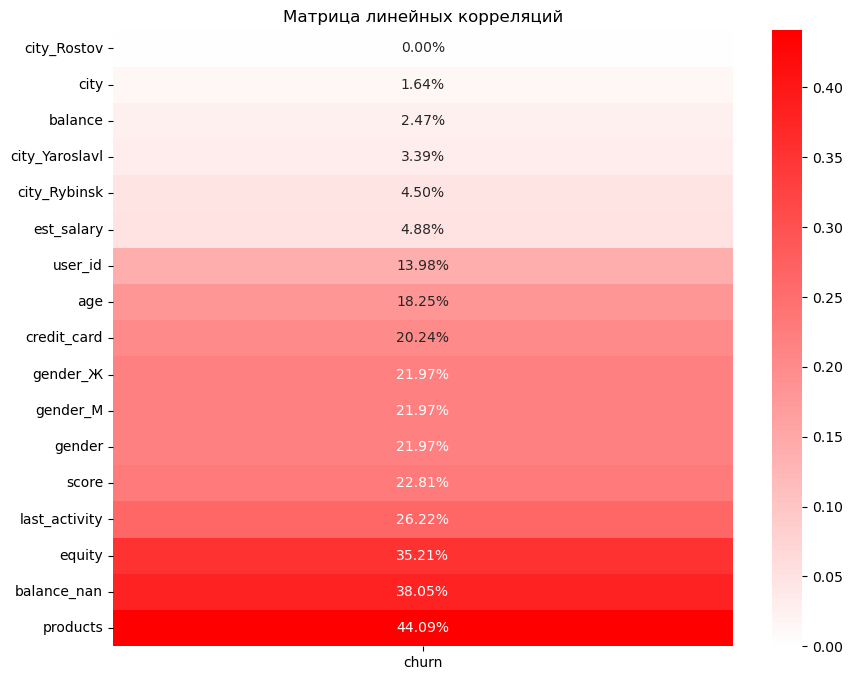

In [100]:
plt.figure(figsize = (10,8))
sns.heatmap(phik_data.loc[:,['churn']].sort_values('churn').drop('churn'),annot = True, fmt = '.2%', cmap = 'bwr', center=0)
plt.title('Матрица линейных корреляций') 
plt.show()  

По матрице линейных корреляций можно сделать следующие выводы: 

   * среди всех признаков, которые влияют на отточность клиентов из банка, можно отметить количество продуктов, которыми пользуется клиент(44 %);
    
   * количество баллов собственности также влияет на решение клиента уйти из банка (35 %);
    
   * среди других факторов, побуждающих на отточность клиентов являются: активность клиента в последнее время(26%), количество баллов кредитного скоринга (23 %)
    
   * меньше всего на решение клиента покинуть банк влияют город обслуживания (1.64 %), баланс на счете (2.47%)

## 10 2.3 Категоризация признаков

Категоризацию признаков будем проводить для непрерывных признаков, а именно: 

   * age
   * score 
   * balance 
   * est_salary 
    

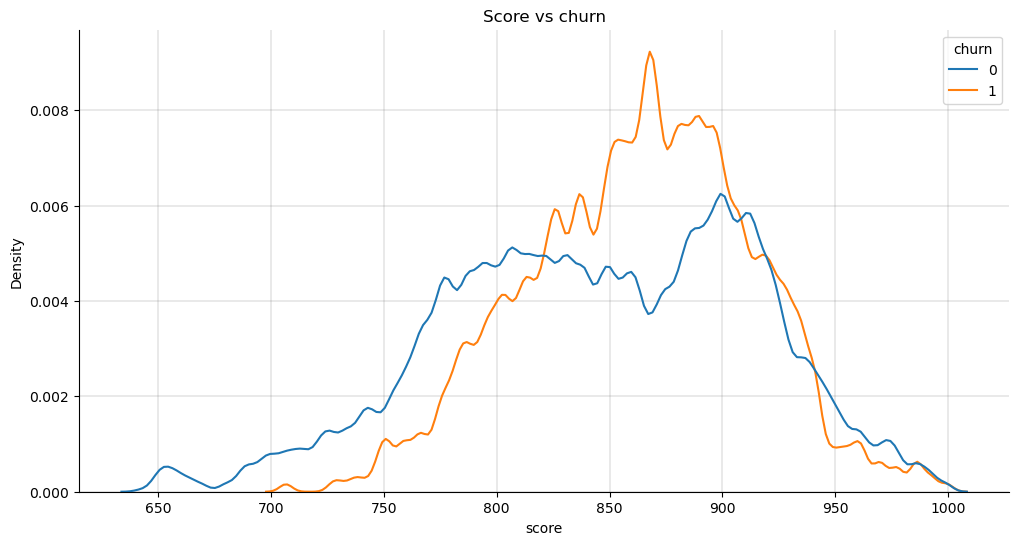

In [101]:
# Посмотрим на зависимость score на отток, построим kdeplot
fig, ax = plt.subplots( figsize=(12, 6))
sns.despine(left=False, ax=ax)
sns.kdeplot(data=data, x='score', hue='churn', common_norm=False, fill=False, ax=ax, bw_adjust=0.25)
ax.grid( color='grey', lw=0.25)
ax.set_title("Score vs churn")
plt.show();

   Score имеет вид нормального распределения. Можно выполнить деление на равное количество в группах с помощью pd.qcut. Оптимальным будем считать 3 группы.

In [102]:
data['score_categories_bins'] = pd.qcut(data['score'], 3) 
data['score_categories_bins']

0         (819.0, 886.0]
1         (819.0, 886.0]
2        (886.0, 1000.0]
3         (819.0, 886.0]
4       (641.999, 819.0]
              ...       
9995    (641.999, 819.0]
9996     (886.0, 1000.0]
9997     (886.0, 1000.0]
9998    (641.999, 819.0]
9999      (819.0, 886.0]
Name: score_categories_bins, Length: 9974, dtype: category
Categories (3, interval[float64, right]): [(641.999, 819.0] < (819.0, 886.0] < (886.0, 1000.0]]

In [103]:
data.assign(score_categories_bins =lambda row: row['score_categories_bins'].astype(str))\
    .groupby('score_categories_bins').agg({'churn': 'mean'}).sort_values(by='churn', ascending = False).round(3)

,churn
score_categories_bins,
"(819.0, 886.0]",0.251
"(886.0, 1000.0]",0.189
"(641.999, 819.0]",0.107


   Клиенты, имеющие от 819 до 886 баллов кредитного скоринга, с большей веротяностью склоняются к уходу из банковского учреждения.

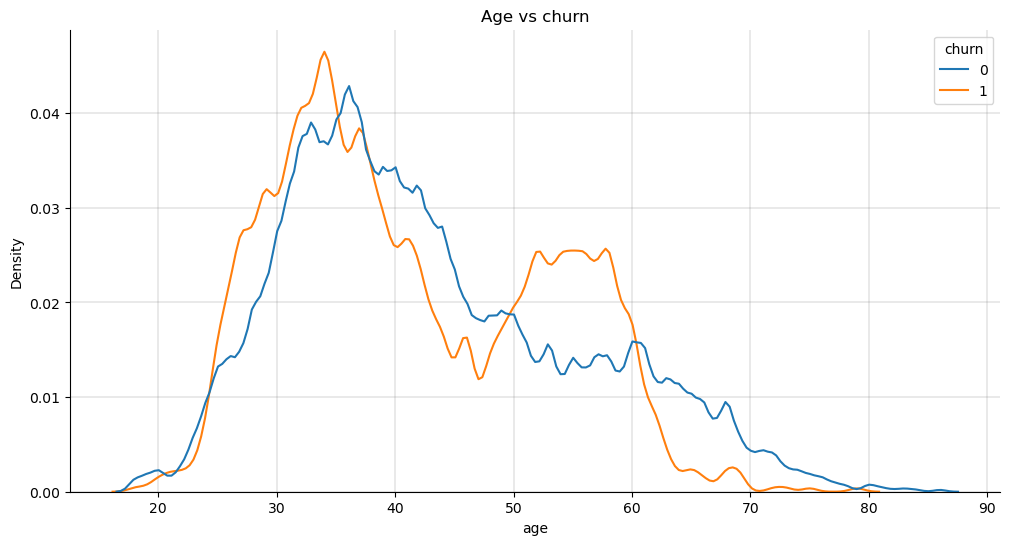

In [104]:
# Посмотрим на зависимость age  на отток, построим kdeplot
fig, ax = plt.subplots( figsize=(12, 6))
sns.despine(left=False, ax=ax)
sns.kdeplot(data=data, x='age', hue='churn', common_norm=False, fill=False, ax=ax, bw_adjust=0.25)
ax.grid( color='grey', lw=0.25)
ax.set_title("Age vs churn")
plt.show();

Age не имеет вид нормального распределения. С возрастом однозначно нельзя сказать, увеличивается вероятность оттока либо нет. Выполним деление на равное количество в группах с помощью pd.qcut. Оптимальным будем считать 4 группы.

In [105]:
data['age_bins'] = pd.qcut(data['age'], 4) 
data['age_bins']

0       (17.999, 33.0]
1         (33.0, 40.0]
2       (17.999, 33.0]
3         (40.0, 51.0]
4         (33.0, 40.0]
             ...      
9995    (17.999, 33.0]
9996      (40.0, 51.0]
9997    (17.999, 33.0]
9998      (51.0, 86.0]
9999      (51.0, 86.0]
Name: age_bins, Length: 9974, dtype: category
Categories (4, interval[float64, right]): [(17.999, 33.0] < (33.0, 40.0] < (40.0, 51.0] < (51.0, 86.0]]

In [106]:
data.assign(age_bins = lambda row: row['age_bins'].astype(str))\
    .groupby('age_bins').agg({'churn': 'mean'}).sort_values(by='churn', ascending = False).round(3)

,churn
age_bins,
"(17.999, 33.0]",0.211
"(51.0, 86.0]",0.189
"(33.0, 40.0]",0.178
"(40.0, 51.0]",0.151


   Наибольшая вероятность оттока клиентов наблюдается в двух возрастных категориях: от 51 до 86 леь и от 18 до 33 лет. Наименее всего подвержены уходу из банка люди от 40 до 51 года.

In [107]:
# Определим границу за 95 перцентиль для избежания выбросов
balance_threshold = np.nanpercentile(data['balance'], 95)

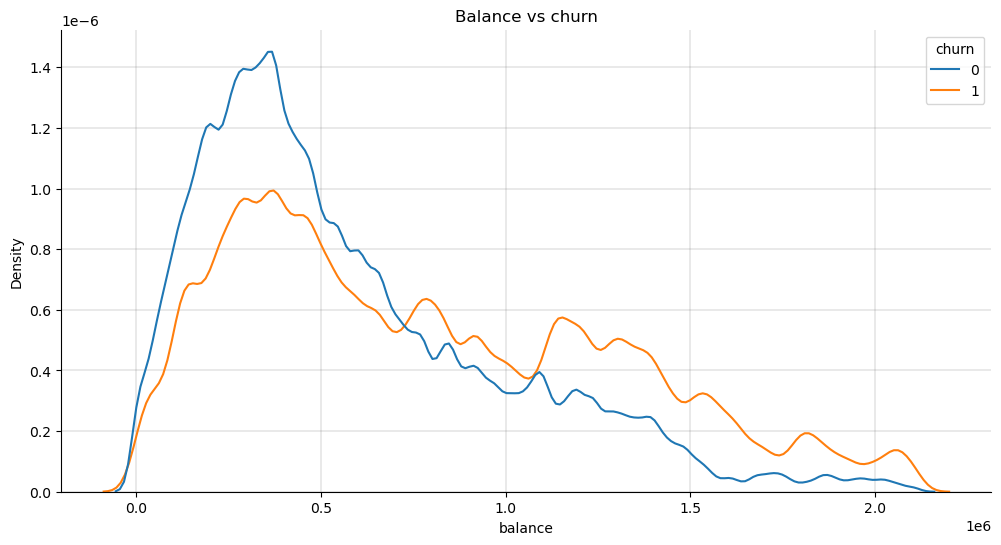

In [108]:
# Посмотрим на зависимость balance на отток (churn)
fig, ax = plt.subplots( figsize=(12, 6))
sns.despine(left=False, ax=ax)
sns.kdeplot(data=data.loc[data['balance'] <= balance_threshold],
            x='balance', hue='churn', common_norm=False, fill=False, ax=ax, bw_adjust=0.25)
ax.grid( color='grey', lw=0.25)
ax.set_title("Balance vs churn")
plt.show();


Видим, что есть длинные хвосты в районе больших значений, поэтому делить категории на равные интервалы нецелесообразно. 

Отток увеличивается с определенного момента (примерно с 0.7 вероятность оттока стала выше, а с 1.25 резко выше). 

In [109]:
# Определим границу за 95 перцентиль для избежания выбросов 
est_salary_threshold = np.nanpercentile(data['est_salary'], 95)

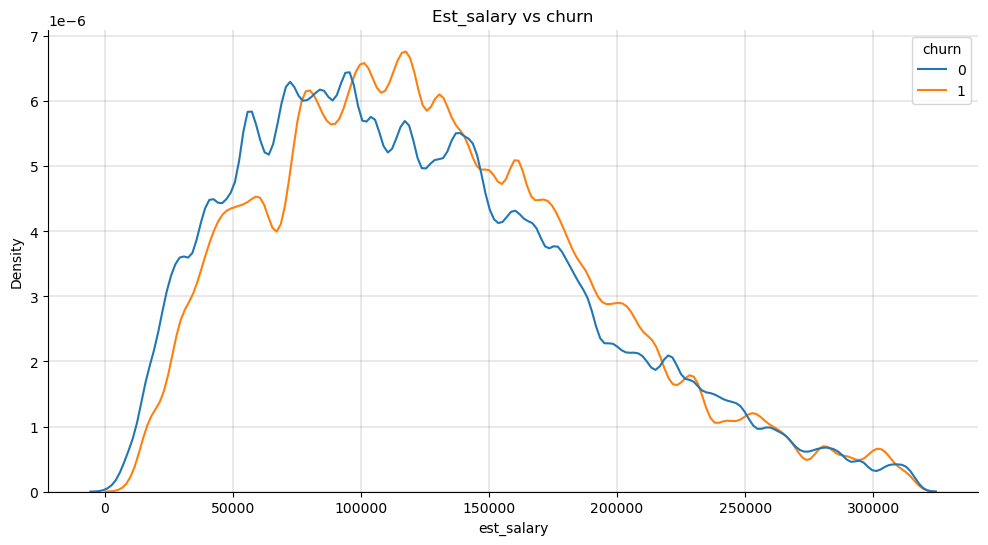

In [110]:
# Посмотрим на зависимость est_salary на отток (churn)
fig, ax = plt.subplots( figsize=(12, 6))
sns.despine(left=False, ax=ax)
sns.kdeplot(data=data.loc[data['est_salary'] <= est_salary_threshold],
            x='est_salary', hue='churn', common_norm=False, fill=False, ax=ax, bw_adjust=0.25)
ax.grid( color='grey', lw=0.25)
ax.set_title("Est_salary vs churn")
plt.show();


   Est_salary имеет вид нормального распределения. Выполним деление на равное количество в группах с помощью pd.qcut. Оптимальной будем считать 5 групп.

In [111]:
data['est_salary_bins'] = pd.qcut(data['est_salary'], 5) 
data['est_salary_bins'] 

0        (66370.382, 101297.278]
1        (66370.382, 101297.278]
2        (101297.278, 139274.83]
3        (139274.83, 189202.284]
4        (66370.382, 101297.278]
                  ...           
9995       (2546.299, 66370.382]
9996    (189202.284, 1395064.45]
9997     (101297.278, 139274.83]
9998     (66370.382, 101297.278]
9999       (2546.299, 66370.382]
Name: est_salary_bins, Length: 9974, dtype: category
Categories (5, interval[float64, right]): [(2546.299, 66370.382] < (66370.382, 101297.278] < (101297.278, 139274.83] < (139274.83, 189202.284] < (189202.284, 1395064.45]]

In [112]:
data.assign(est_salary_bins =lambda row: row['est_salary_bins'].astype(str))\
    .groupby('est_salary_bins').agg({'churn': 'mean'}).sort_values(by='churn', ascending = False).round(3)

,churn
est_salary_bins,
"(101297.278, 139274.83]",0.206
"(139274.83, 189202.284]",0.201
"(189202.284, 1395064.45]",0.184
"(66370.382, 101297.278]",0.171
"(2546.299, 66370.382]",0.149


   Клиенты, имеющие оценочный доход от 100000 до 140000 рублей, проявляют наибольшее желание сменить банк. Также с наибольшей вероятностью покидают банк клиенты с оценочным доходом от 140000 до 189200 рублей

##  11  2.4 Определение целевой переменной и выявление закономерностей между целевой переменной и остальными признаками

In [113]:
data.assign(products =lambda row: row['products'].astype(str))\
    .groupby('products').agg({'churn': 'mean'}).sort_values(by='churn', ascending = False).round(3)


,churn
products,
0,1.000
4,0.633
5,0.421
3,0.286
2,0.191
1,0.071


   Клииенты, не имеющие продуктов, покидают банк с вероятностью 100 %. Также высока оттока клиентов с 4 продуктами(63.3 %) и с 5 продуктами (42 %). Наименее склонны уходить из банка клиенты, пользующиеся 1 продуктом.

In [114]:
data.assign(equity =lambda row: row['equity'].astype(str))\
    .groupby('equity').agg({'churn': 'mean'}).sort_values(by='churn', ascending = False).round(3) 

,churn
equity,
9,0.538
7,0.462
6,0.360
8,0.353
5,0.301
4,0.251
3,0.209
2,0.158
1,0.120


 Можно заметить тенденцию, что с  увеличением количества баллов собственности возрастает и отточность клиентов. 
 
 Наиболее склонны к оттоку  клиенты с 9 баллами (54 %) и клиенты с 7 баллами (46 %).

In [115]:
data.groupby('last_activity')['churn'].agg('mean').round(3)


last_activity
0    0.114
1    0.245
Name: churn, dtype: float64

Активные клиенты чаще хотят уйти из банка, чем неактивные клиенты

In [116]:
data.groupby('credit_card')['churn'].agg('mean').round(3)

credit_card
0    0.256
1    0.148
Name: churn, dtype: float64

Клиенты, не имеющие кредитной карты, с большей вероятностью уходят из банка, чем клиенты не использующие кредитную карту

 Выводы по исследовательскому анализу данных: 
    
В ходе исследовательского анализа данных были получены следующие результаты: 

* 81.8 % клиентов остаются в банке, 18.2 % уходят; 
* 68 % клиентов используют кредитную карту, 32 % не используют ;
* наибольшая часть клиентов пользуются 1 либо 2 банковскими продуктами; 
* вероятность оттока клиентов с 4 и 5 продуктами высокая; 
* средний возраст клиента банка равен 42 годам; 
* 52.3 % клиентов банка являются активными; 
* больше половины клиентов банка осблуживаются в Ярославле; 
* клиенты с 7 и 9 баллами собственности чаще других хотят уйти из банка;
* проведена категоризация непрерывных признаков для age, score, balance и est_salary;
* клиенты, не имеющие кредитной карты, с большей вероятностью уходят из банка, чем клиенты не использующие кредитную карту; 
* оценочный доход клиентов, склонных к оттоку, составляет от 100000 до 200000 рублей; 
* процент оттока клиентов зависит от остатка баланса на счете. Клиенты , имеющие остаток баланса выше 750000 рублей чаще уходят из банка  
* клиенты, имеющие от 819 до 886 баллов кредитного скоринга, чаще уходят из банка
* наиболее склонны к уходу из банка клиенты в возрасте от 18 до 33 лет и от 51 до 86 лет




## 12 3 Проверка статистических гипотез 

## 13 3.1 Формирование контрольной и экспериментальной выборок

Проверим  гипотезу различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

Сформулируем гипотезы: 

 Н0 - средний возраст клиентов, которые пользуются одним продуктом банка =  среднему возрасту клиентов, которые пользуются двумя банковскими продуктами; 
 
 Н1 - средний возраст клиентов, которые пользуются одним продуктом банка не равен среднему возрасту клиентов, которые пользуются двумя банковскими продуктами 

In [117]:
# Cформируем контрольную и экспериментальную выборки 
group_a1= data[data['products'] ==2]['age']
group_b1 = data[data['products'] ==1]['age']

In [118]:
len(group_a1)

5119

In [119]:
len(group_b1)

3323

Проверим также гипотезу о различии оценочного дохода между активными и неактивными клиентами 

Сформулируем гипотезы

H0 - средний оценочный доход активных клиентов равен среднему оценочному доходу неактивных клиентов 

H1 - средний оценочный доход активных клиентов не равен среднему оценочному доходу неактивных клиентов 

In [120]:
# Cформируем контрольную и экспериментальную выборки 
group_a2 = data[data['last_activity'] ==1]['est_salary']

group_b2 = data[data['last_activity'] ==0]['est_salary']

In [121]:
len(group_a2)

5215

In [122]:
len(group_b2)

4759

## 14  3.2  Выбор статистического теста и его обоснование

  Для проведения статистической проверки гипотез проверим из какого распределения пришли выборки и присутствуют ли выбросы. 

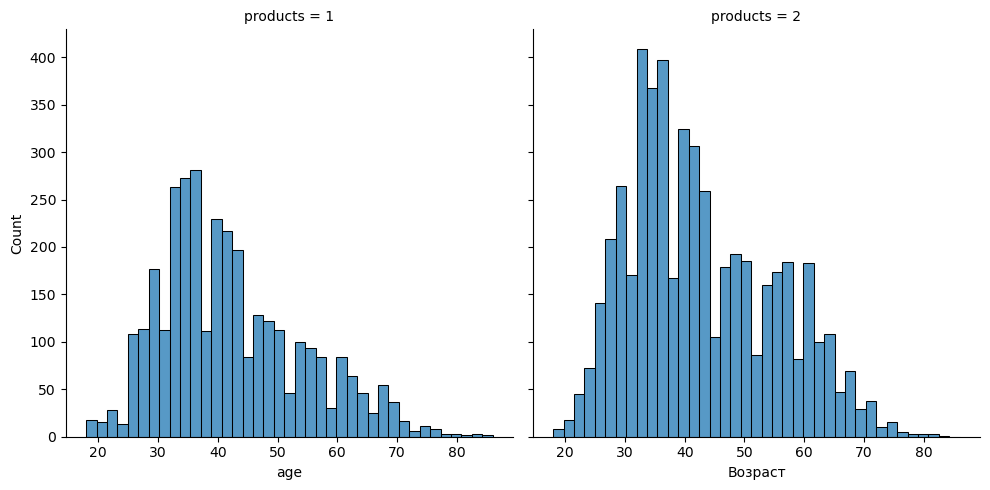

In [123]:

sns.displot(data= data.query('products in [1,2]'),
     x="age",  col='products') 
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.show()

Выборки пришли из нормального распределения, аномальные выбросы не наблюдаются. Применим t-критерий Стьюдента  

Зададим уровень статистической значимости a = 0.05. Это ошибка первого рода.

In [124]:

results = st.ttest_ind(group_a1, group_b1,  alternative = 'two-sided', equal_var = True)

# уровень статистической значимости 
alpha = 0.05 

print('Pvalue:', results.pvalue) 

if results.pvalue < alpha: 
    
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не отвергаем нулевую гипотезу') 
    
    

Pvalue: 0.03351546829239861
Отвергаем нулевую гипотезу


   Получившееся значение pvalue < 0.05. Таким образом, на имеющихся данных на уровне значимости 5% (уровне доверия 95%) есть основания  отвергнуть нулевую гипотезу в пользу альтернативы. Cредний возраст клиентов, которые пользуются одним продуктом банка не равен среднему возрасту клиентов, которые пользуются двумя продуктами банка. 

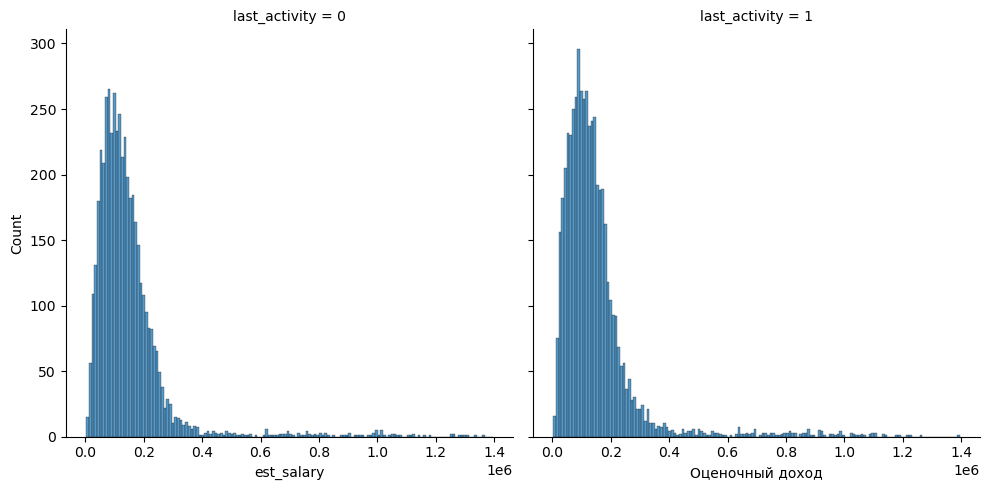

In [125]:
sns.displot(data= data.query('last_activity in [0,1]'),
     x="est_salary",  col='last_activity') 
plt.xlabel('Оценочный доход')
plt.ylabel('Количество клиентов')
plt.show()

   Гистограммы не имеют вид нормального распределения, присутствуют аномальные выбросы в сторону большиx значений. Будем использовать U-критерий Манна-Уитни, который менее подвержен выбросам.

In [126]:
results = st.mannwhitneyu(group_a2, group_b2, alternative = 'two-sided') 

# уровень статистической значимости 
alpha = 0.05 

print('Pvalue:', results.pvalue) 

if results.pvalue < alpha: 
    
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не отвергаем нулевую гипотезу') 
    

Pvalue: 0.16213892043225542
Не отвергаем нулевую гипотезу


   Получившееся значение pvalue > 0.05. Таким образом, на имеющихся данных на уровне значимости 5% (уровне доверия 95%) нет оснований  отвергнуть нулевую гипотезу в пользу альтернативы. Средний оценочный доход активных клиентов равен среднему оценочному доходу неактивных клиентов 

Выводы по проверке статистических гипотез: 
   
1. Были сформулированы и проверены статистические гипотезы о равенстве среднего возраста клиентов, пользующихся одним продуктом банка и клиентов,пользующихся двумя продуктами и о равенстве среднего оценочного дохода активных и неактивных клиентов 
2. По результатам проверок статистических гипотез обнаружено: 
  * есть статистически значимая разница между средним возрастом клиента и количеством продуктов, которыми он пользуется; 
  * нет статистически значимой разницы между средним оценочным доходом активных и неактивных клиентов.

## 15 4 Сегментация пользователей на основе данных о количестве потребляемых продуктов и пользовательской активности

## 16 4.1 Сегментация пользователей на основе количества потребляемых продуктов 


In [127]:
# Посчитаем распределение пользователей по количеству потребляемых продуктов
count_of_products = data.groupby('products')['products'].count()
count_of_products

products
0       1
1    3323
2    5119
3    1038
4     474
5      19
Name: products, dtype: int64

<Figure size 1000x900 with 0 Axes>

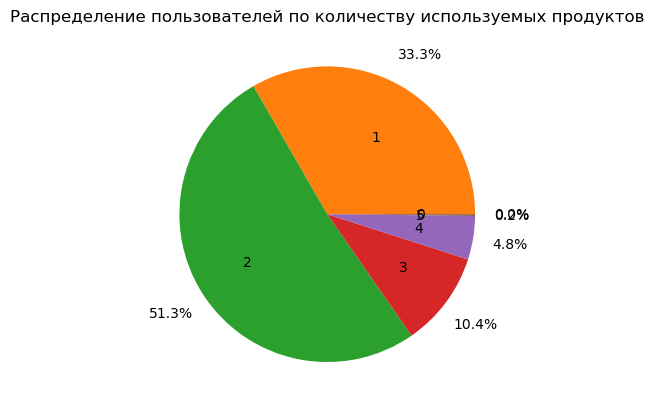

In [128]:
plt.figure(figsize=(10,9))

labels = count_of_products.index

fig, ax = plt.subplots()

ax.pie(count_of_products, labels= count_of_products.index, autopct = '%1.1f%%',  pctdistance=1.25, labeldistance=.6)
ax.set_title('Распределение пользователей по количеству используемых продуктов')
plt.show() 

Посмотрим на распределение пользователей в разбивке по количеству используемых продуктов. 

C:\Users\user\AppData\Local\Temp\ipykernel_5344\2328203306.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x = data['score'],  common_norm = False, hue = data['products'])


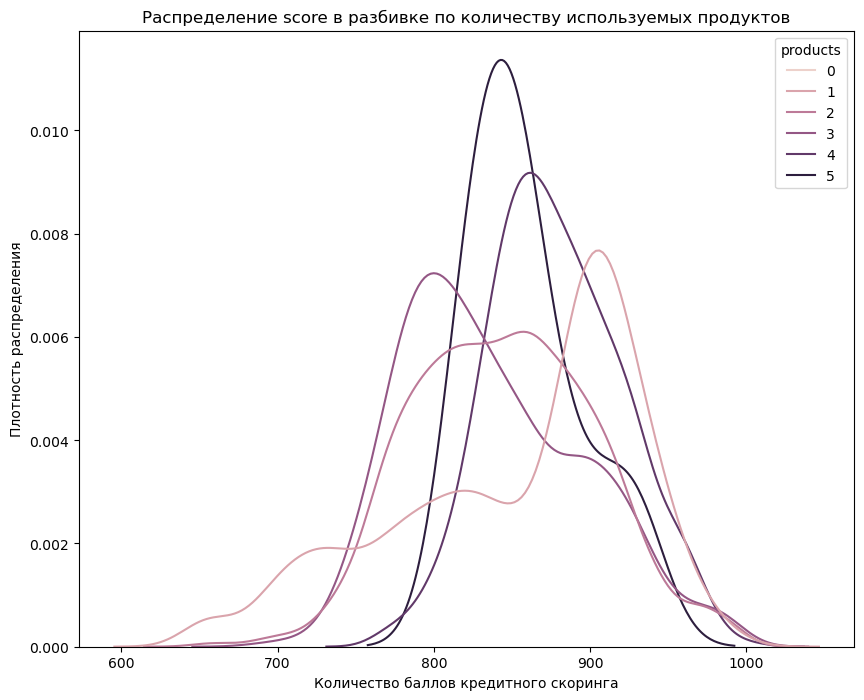

In [129]:
plt.figure(figsize=(10,8))
sns.kdeplot(x = data['score'],  common_norm = False, hue = data['products'])
plt.title('Распределение score в разбивке по количеству используемых продуктов')
plt.xlabel('Количество баллов кредитного скоринга')
plt.ylabel('Плотность распределения')
plt.show()  
 

Клиенты с 5 продуктами имеют от 750 до 1000 баллов кредитного скоринга. Клиенты с 1 банковским продуктом, имеют от 600 до 1000 баллов кредитного скоринга.

Можно заметить, что количество продуктов, которыми пользуется клиент, не зависит от баллов кредитного скоринга

In [130]:
# Посмотрим как распределились пользователи по городам в зависимости от количества потребляемых продуктов 
distribution_by_city = data.groupby('products').agg({'city_Rostov': 'sum', 'city_Rybinsk': 'sum', 'city_Yaroslavl': 'sum'}).reset_index()
distribution_by_city = distribution_by_city.drop(0)
distribution_by_city

,products,city_Rostov,city_Rybinsk,city_Yaroslavl
1,1,444,857,2022
2,2,805,1560,2754
3,3,95,165,778
4,4,68,99,307
5,5,4,1,14


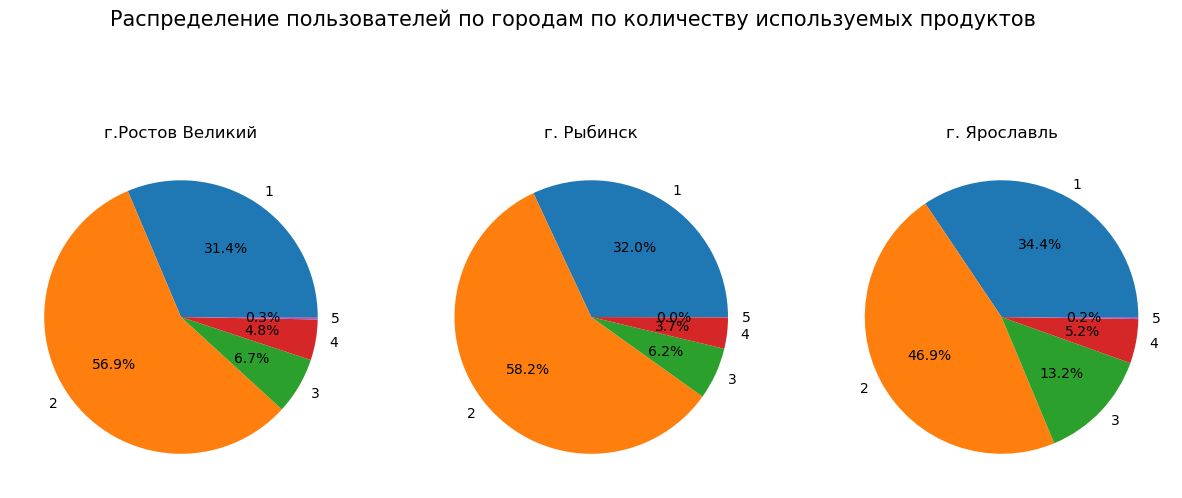

In [131]:
fig, axs = plt.subplots(nrows= 1 , ncols= 3, figsize=(15,15))

fig.suptitle('Распределение пользователей по городам по количеству используемых продуктов', fontsize = 15, y = 0.7)

axs[0].pie(distribution_by_city['city_Rostov'], labels=distribution_by_city['products'], autopct='%1.1f%%')
axs[0].set_title('г.Ростов Великий')
axs[1].pie(distribution_by_city['city_Rybinsk'], labels=distribution_by_city['products'], autopct='%1.1f%%')
axs[1].set_title('г. Рыбинск')
axs[2].pie(distribution_by_city['city_Yaroslavl'], labels=distribution_by_city['products'], autopct='%1.1f%%')
axs[2].set_title('г. Ярославль')
plt.show();

   Во всех городах клиенты в большинстве используют 1 и 2 продукта. В Ярославле доля клиентов, использующих 3 продукта выше чем в Рыбинске и Ростове Великом.

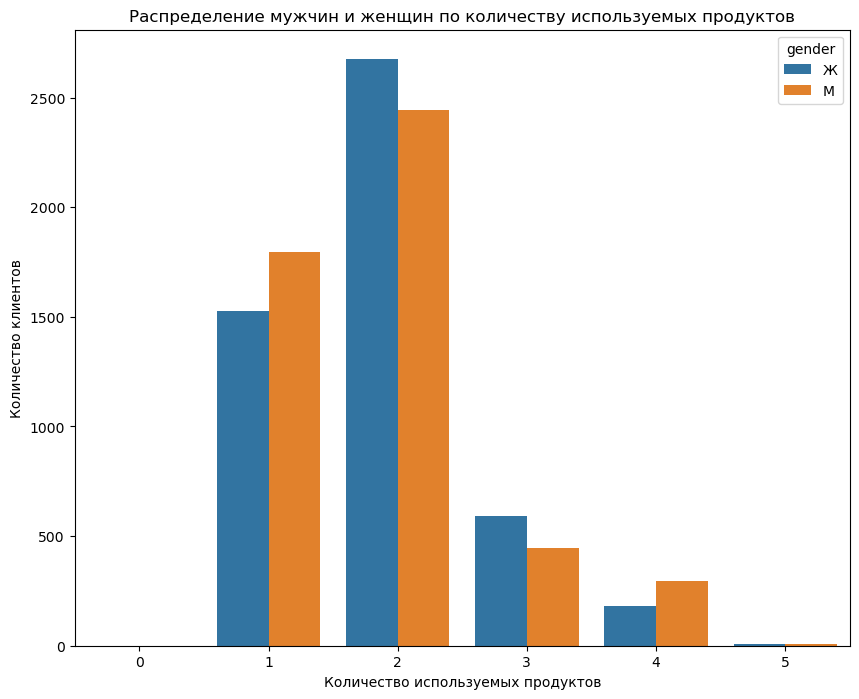

In [132]:
plt.figure(figsize=(10,8))
sns.countplot( data = data, x = 'products', hue = 'gender')
plt.title('Распределение мужчин и женщин по количеству используемых продуктов')
plt.xlabel('Количество используемых продуктов')
plt.ylabel('Количество клиентов')
plt.show()  

Среди клиентов, использующих 1 и 4 продукта, преобладают мужчины. 2 и 3 продуктами пользуются больше женщины

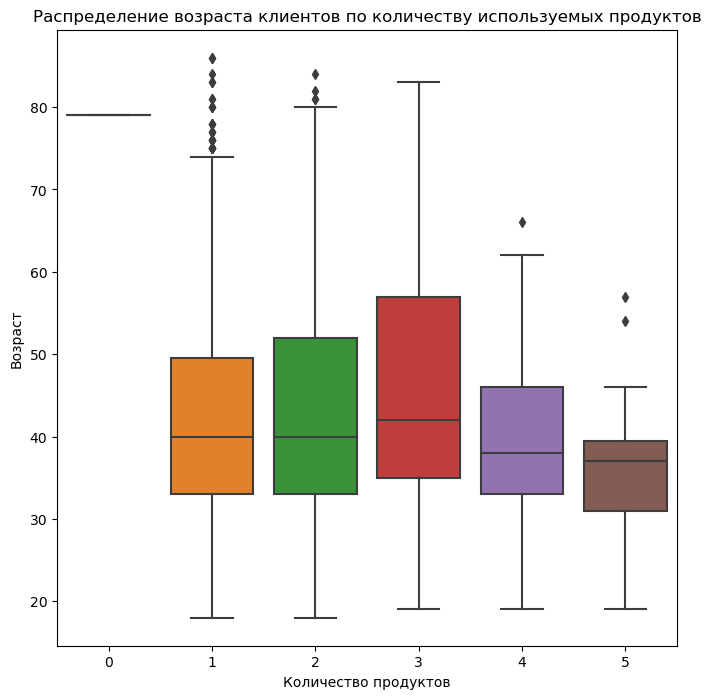

In [133]:
plt.figure(figsize=(8,8))
sns.boxplot( data = data, x = 'products', y = 'age')
plt.title('Распределение возраста клиентов по количеству используемых продуктов')
plt.xlabel('Количество продуктов')
plt.ylabel('Возраст')
plt.show()  

Возрастные клиенты используют большее число продуктов, чем молодые и люди среднего возраста

Text(0, 0.5, 'Количество баллов собственности')

<Figure size 900x900 with 0 Axes>

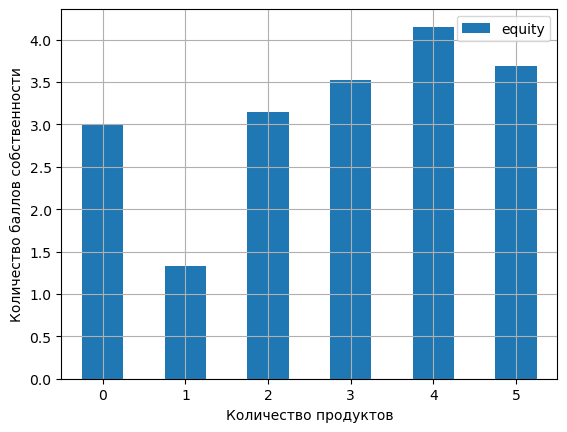

In [134]:
plt.figure(figsize=(9,9))
data.pivot_table( index = 'products', values= 'equity', aggfunc = 'mean').plot(kind = 'bar', grid = True)
plt.xticks(rotation = 'horizontal')
plt.xlabel('Количество продуктов')
plt.ylabel('Количество баллов собственности')

Клиенты с 3,4 и 5 продуктами имеют в среднем от 3.5 баллов собсвтенности и выше.

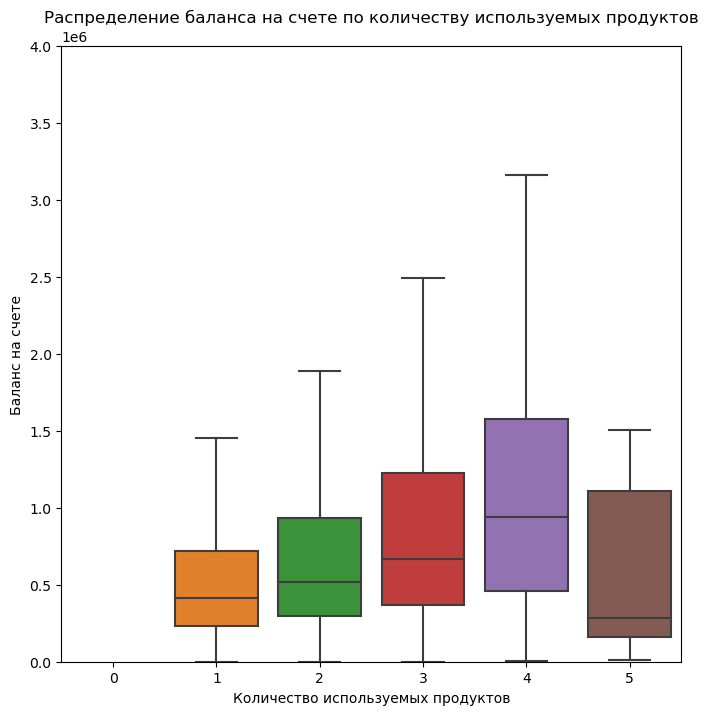

In [135]:
plt.figure(figsize=(8,8))
sns.boxplot( data = data, x = 'products', y =  'balance', showfliers = False)
plt.title('Распределение баланса на счете по количеству используемых продуктов')
plt.xlabel('Количество используемых продуктов')
plt.ylabel('Баланс на счете')
plt.ylim(0,4000000)
plt.show()  

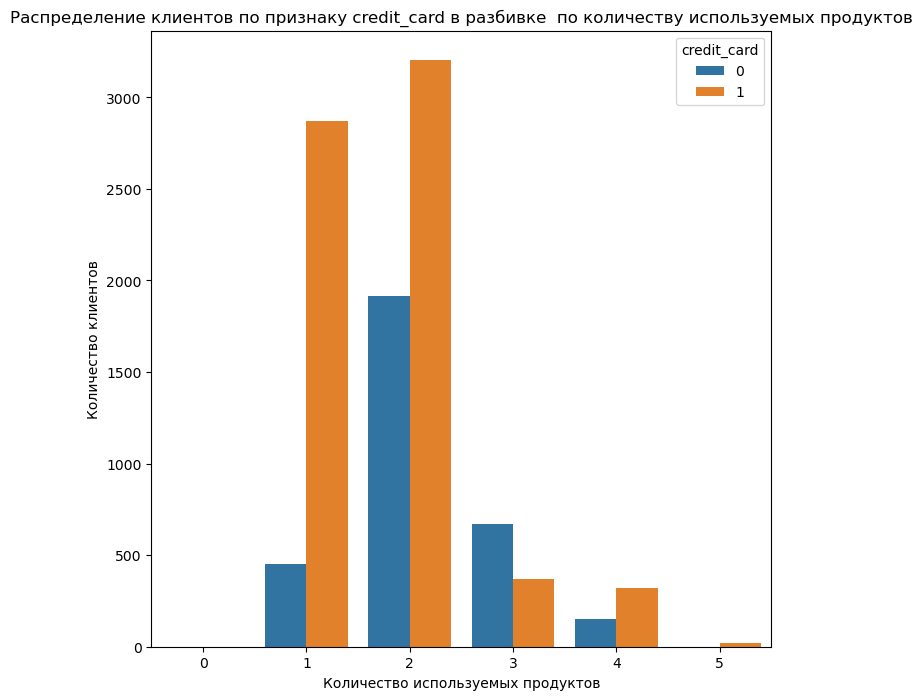

In [136]:
plt.figure(figsize=(8,8))
sns.countplot( data = data, x = 'products', hue = 'credit_card') 
plt.title('Распределение клиентов по признаку credit_card в разбивке  по количеству используемых продуктов')
plt.ylabel('Количество клиентов')
plt.xlabel('Количество используемых продуктов')
plt.show()  

Клиенты, использующие 1,2 и 4 продукта, в основном имеют кредитную карту.

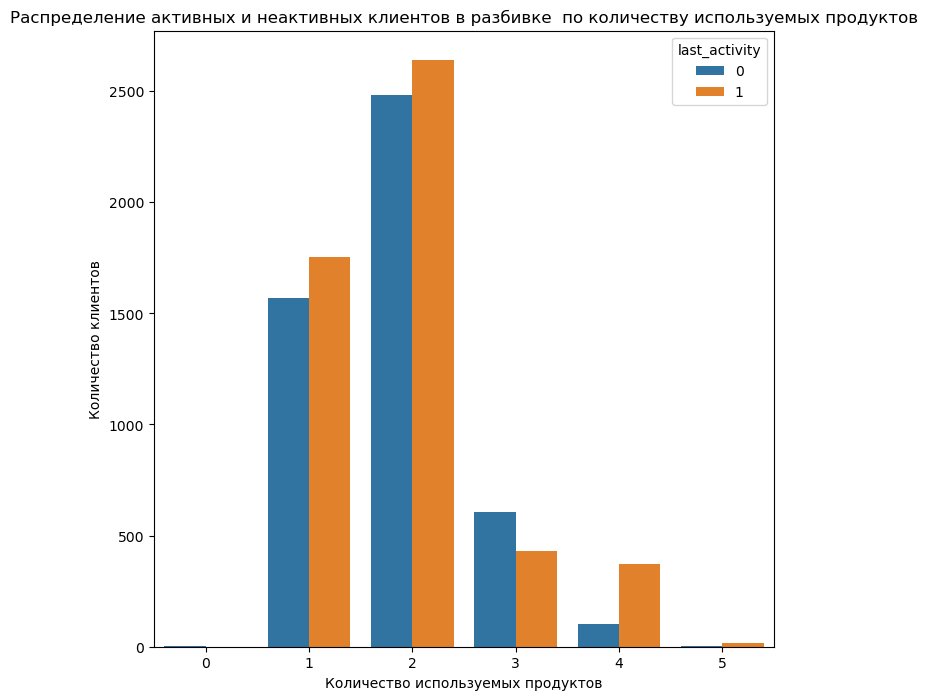

In [137]:
plt.figure(figsize=(8,8))
sns.countplot( data = data, x = 'products', hue = 'last_activity')
plt.title('Распределение активных и неактивных клиентов в разбивке  по количеству используемых продуктов')
plt.ylabel('Количество клиентов')
plt.xlabel('Количество используемых продуктов')
plt.show()  

Среди клиентов, использующих 1,2 и 4 продукта, больше активных, чем неактивных

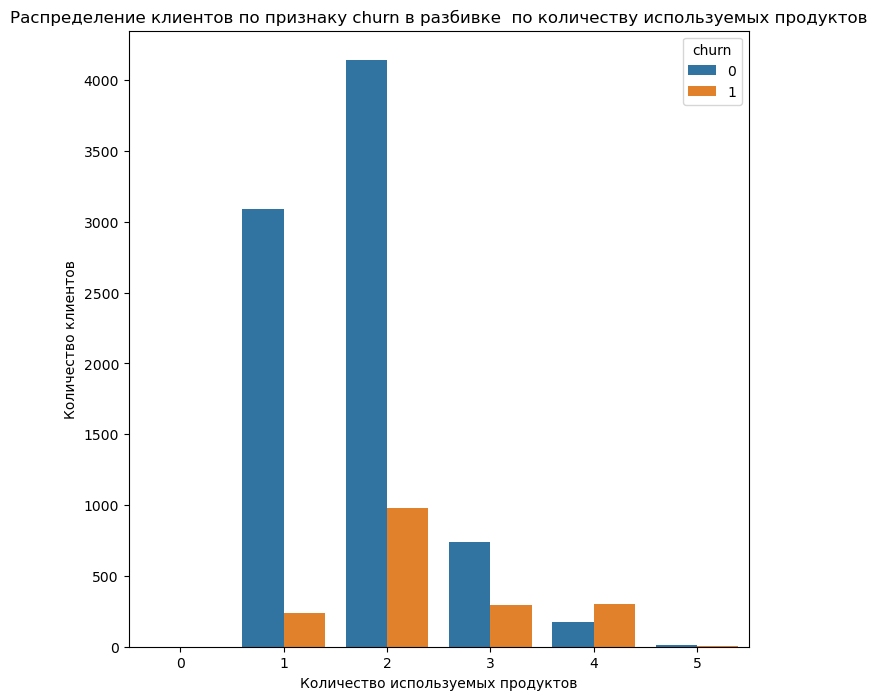

In [138]:
plt.figure(figsize=(8,8))
sns.countplot( data = data, x = 'products', hue = 'churn') 
plt.title('Распределение клиентов по признаку churn в разбивке  по количеству используемых продуктов')
plt.ylabel('Количество клиентов')
plt.xlabel('Количество используемых продуктов')
plt.show() 

Клиенты, использующие 4 и более продукта чаще уходят из банка, чем остаются

На основании результатов сегментации пользователей по количеству используемых продуктов можно сделать следующие выводы: 

   * Клиенты с 1 продуктом: Доля клиентов составила 33.3 % от общего количества клиентов.  Средний возраст клиента составил 40 лет. Мужчин среди клиентов больше чем женщин. Клиенты в большинстве своем не имеют баллов собственности. Средний оценочный доход равен 100000 рублей. Среди клиентов примерно поровну активных и неактивных. Среди клиентов намного больше тех, кто пользуется кредитной картой. 
   *  Клиенты с 2 продуктами:  Доля клиентов  составила 51.3 % от общего количества клиентов.  Средний возраст клиента составил 40 лет. Женщин среди клиентов больше чем мужчин. Клиенты в большинстве своем имеют 5 баллов собственности. Средний оценочный доход равен 100000 рублей. Среди клиентов больше активных, чем неактивных. Среди клиентов намного больше тех, кто пользуется кредитной картой. Клиентов, пользующихся кредитной картой в два раза больше чем тех, кто не пользуется. 
   *  Клиенты с 3 продуктами:    Доля клиентов  составила 10.4 % от общего количества клиентов.  Средний возраст клиента составил 43 года. Женщин среди клиентов больше чем мужчин. Клиенты в большинстве своем имеют 4-5 баллов собственности. Средний оценочный доход равен 100000 рублей. Среди клиентов больше неактивных, чем активных. Среди клиентов больше тех, кто не пользуется кредитной картой. 
   * Клиенты с 4 продуктами: Доля клиентов составила 4.8 % от общего количества клиентов.  Средний возраст клиента составил 38 лет. Мужчин среди клиентов больше чем женщин. Клиенты в большинстве своем имеют 4-5 баллов собственности. Средний оценочный доход равен 120000 рублей. Среди клиентов больше активных, чем неактивных. Среди клиентов больше тех, кто пользуется кредитной картой. 
    

## 17 4.2  Сегментация пользователей на основе признака активности 


In [139]:
# Посчитаем распределение пользователей по количеству потребляемых продуктов
count_last_activity = data['last_activity'].value_counts()

<Figure size 1000x900 with 0 Axes>

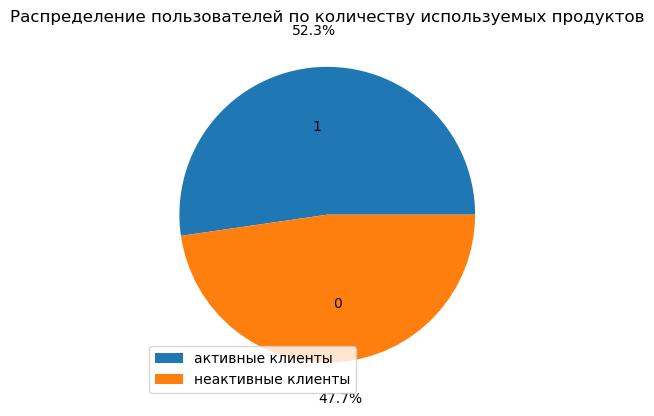

In [140]:
plt.figure(figsize=(10,9))

labels = count_last_activity.index

fig, ax = plt.subplots()

ax.pie(count_last_activity, labels= count_last_activity.index, autopct = '%1.1f%%',  pctdistance=1.25, labeldistance=.6)
ax.set_title('Распределение пользователей по количеству используемых продуктов')
plt.legend(['активные клиенты', 'неактивные клиенты'])
plt.show() 

Посмотрим на распределение пользователей в разбивке по признаку активности 

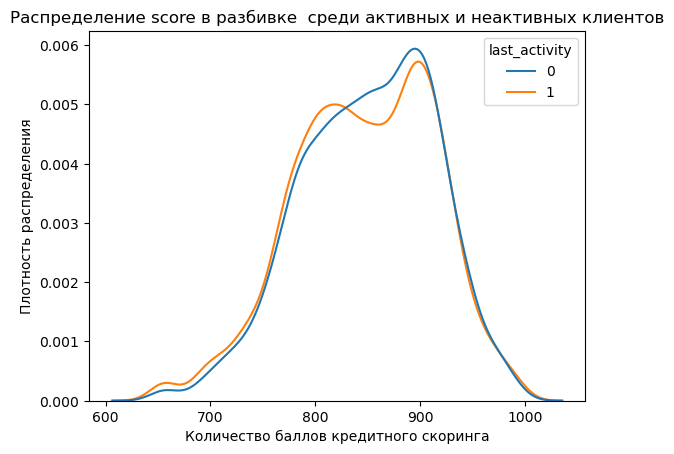

In [141]:
sns.kdeplot(x = data['score'],  common_norm = False, hue = data['last_activity'])
plt.title('Распределение score в разбивке  среди активных и неактивных клиентов')
plt.xlabel('Количество баллов кредитного скоринга')
plt.ylabel('Плотность распределения')
plt.show()  
 

In [142]:
# Посмотрим как распределились пользователи по городам в зависимости от количества потребляемых продуктов 
last_activity = data.groupby('last_activity').agg({'city_Rostov': 'sum', 'city_Rybinsk': 'sum', 'city_Yaroslavl': 'sum'}).reset_index()
last_activity

,last_activity,city_Rostov,city_Rybinsk,city_Yaroslavl
0,0,663,1173,2923
1,1,753,1510,2952


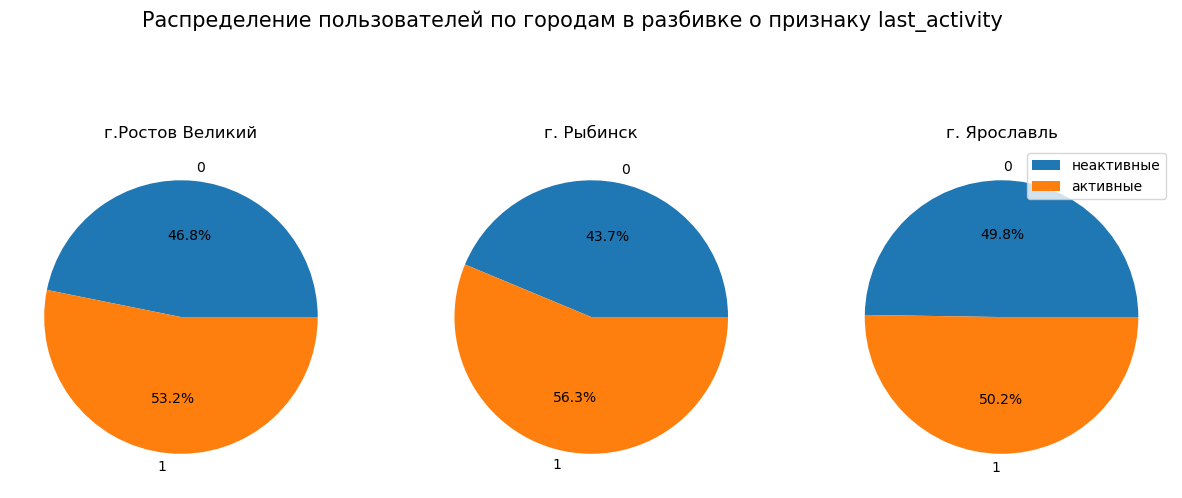

In [143]:
fig, axs = plt.subplots(nrows= 1 , ncols= 3, figsize=(15,15))

fig.suptitle('Распределение пользователей по городам в разбивке о признаку last_activity', fontsize = 15, y = 0.7)

axs[0].pie(last_activity['city_Rostov'], labels=last_activity['last_activity'], autopct='%1.1f%%')
axs[0].set_title('г.Ростов Великий')
axs[1].pie(last_activity['city_Rybinsk'], labels=last_activity['last_activity'], autopct='%1.1f%%')
axs[1].set_title('г. Рыбинск')
axs[2].pie(last_activity['city_Yaroslavl'], labels = last_activity['last_activity'], autopct='%1.1f%%')
axs[2].set_title('г. Ярославль')
plt.legend(['неактивные','активные'])
plt.show();

Во всех городах активных клиентов больше чем неактивных 

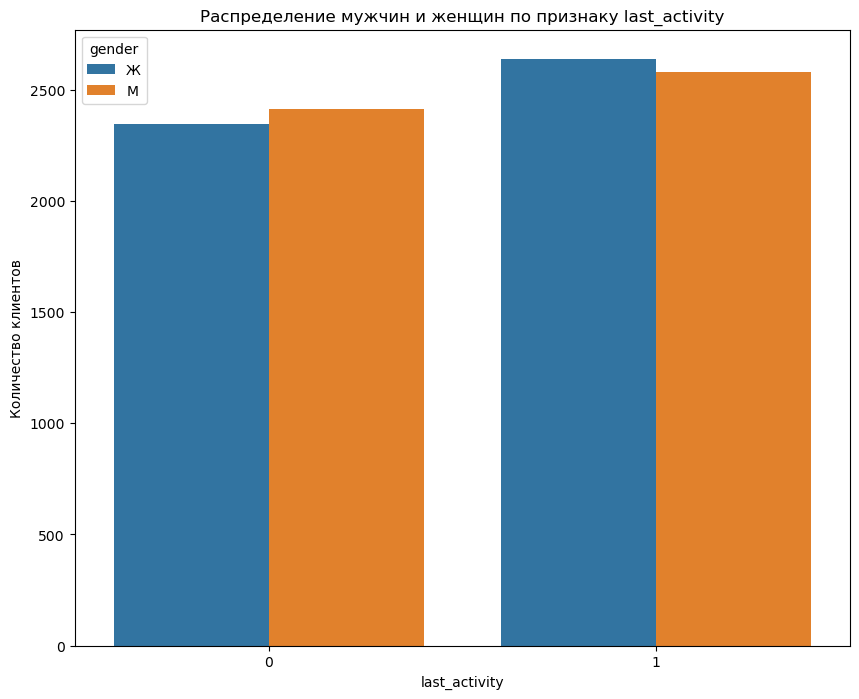

In [144]:
plt.figure(figsize=(10,8))
sns.countplot( data = data, x = 'last_activity', hue = 'gender')
plt.title('Распределение мужчин и женщин по признаку last_activity')
plt.xlabel('last_activity')
plt.ylabel('Количество клиентов')
plt.show()

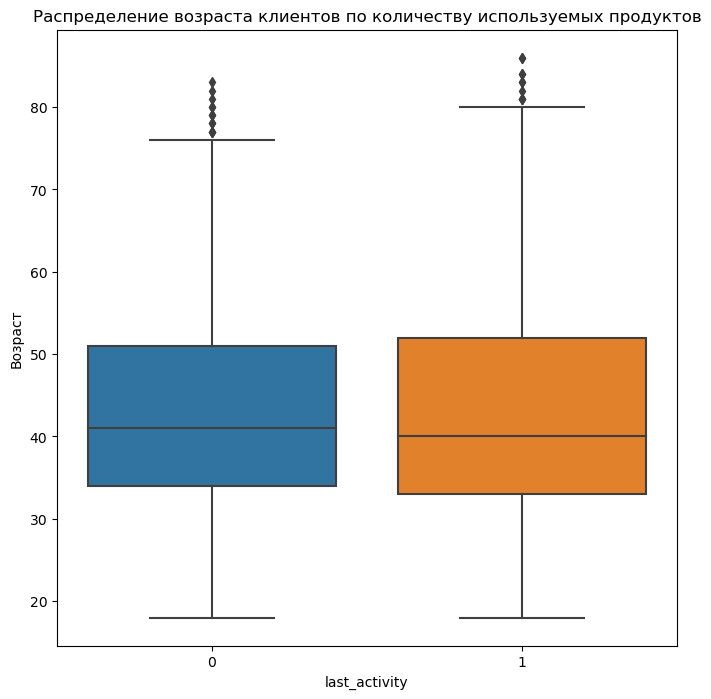

In [145]:
plt.figure(figsize=(8,8))
sns.boxplot( data = data, x = 'last_activity', y = 'age')
plt.title('Распределение возраста клиентов по количеству используемых продуктов')
plt.xlabel('last_activity')
plt.ylabel('Возраст')
plt.show() 

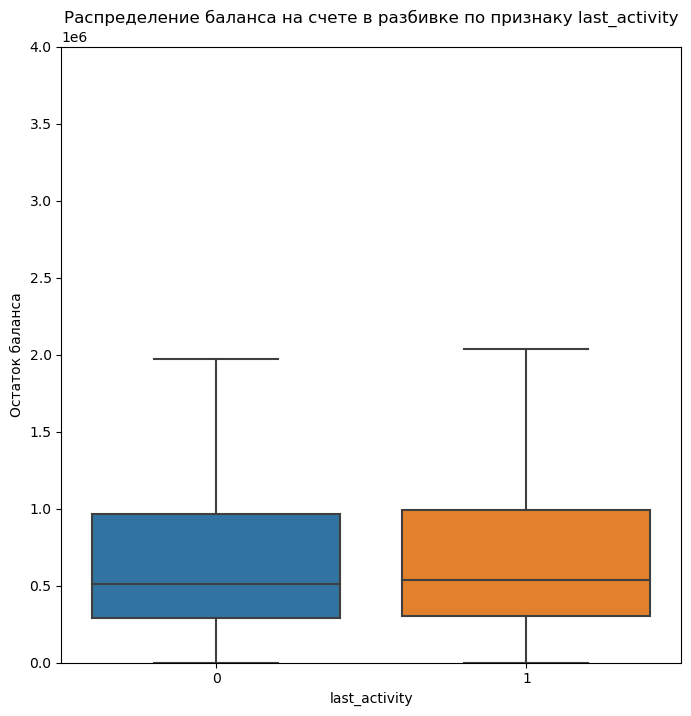

In [146]:
plt.figure(figsize=(8,8))
sns.boxplot( data = data, x = 'last_activity', y =  'balance',  showfliers = False)
plt.title('Распределение баланса на счете в разбивке по признаку last_activity')
plt.xlabel('last_activity')
plt.ylabel('Остаток баланса')
plt.ylim(0,4000000)
plt.show()  

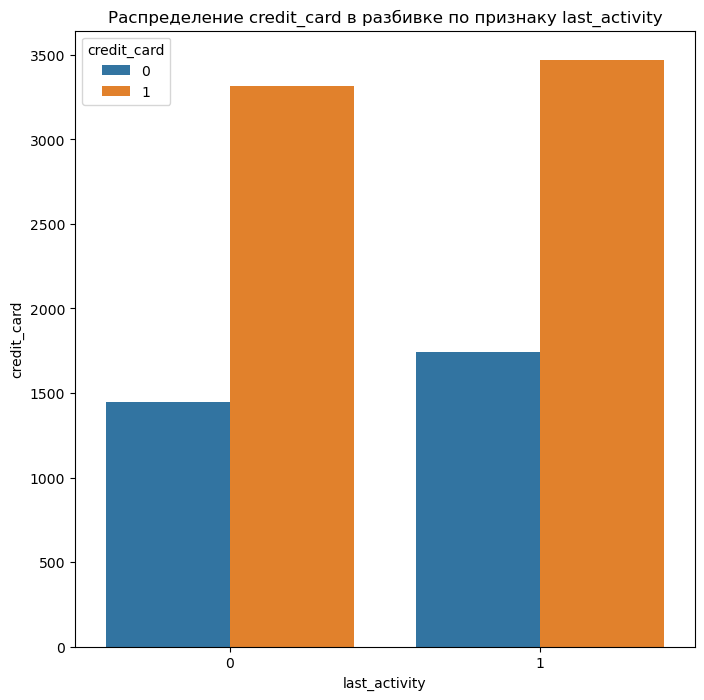

In [147]:
plt.figure(figsize=(8,8))
sns.countplot( data = data, x = 'last_activity', hue = 'credit_card')
plt.title('Распределение credit_card в разбивке по признаку last_activity')
plt.xlabel('last_activity')
plt.ylabel('credit_card')
plt.show()  

Сегментация пользователей на основе признака активности: 

   Неактивные клиенты: Доля клиентов составила 47.7 % от общего числа клиентов. Женщин меньше чем мужчин. Возраст клиентов составил от 35 до 52 лет. Клиенты имеют от 600 до 1000 баллов кредитного скоринга. Остаток баланса на счете = 550000. Оценочный доход составил 125000 рублей. Количество клиентов с кредитной картой намного превышает клиентов без кредитки. 
     
   Активные клиенты: Доля клиентов составила 52.3 % от общего числа клиентов. Женщин больше чем мужчин среди клиентов. Возраст клиентов - от 33 до 52 лет. Остаток баланса на счете = 560000 рублей. Оценочный доход составил 125000 рублей. Количество клиентов с кредитной картой намного превышает клиентов без кредитки

## 18 4.3 Сегментация пользователей на основе возраста клиентов 

In [148]:
count_of_age = data.groupby('age_bins')['age_bins'].count()
count_of_age 

age_bins
(17.999, 33.0]    2519
(33.0, 40.0]      2577
(40.0, 51.0]      2435
(51.0, 86.0]      2443
Name: age_bins, dtype: int64

<Figure size 1000x900 with 0 Axes>

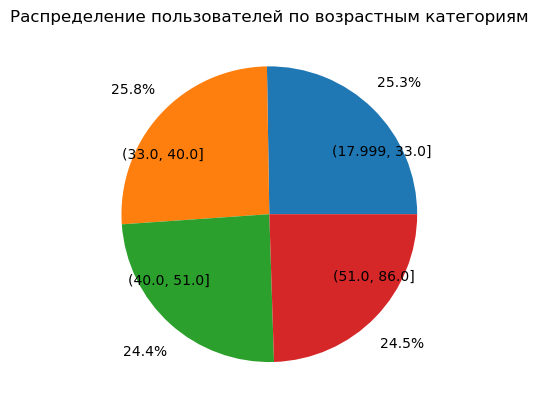

In [149]:
plt.figure(figsize=(10,9))

labels = count_of_age.index

fig, ax = plt.subplots()

ax.pie(count_of_age, labels= count_of_age.index, autopct = '%1.1f%%',  pctdistance=1.25, labeldistance=.6)
ax.set_title('Распределение пользователей по возрастным категориям')
plt.show()

Видим, что категории возрастов пользователей распределились равномерно.

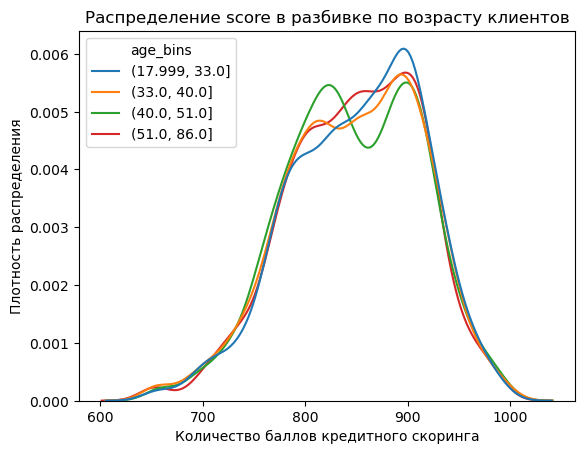

In [150]:
sns.kdeplot(x = data['score'],  common_norm = False, hue = data['age_bins'])
plt.title('Распределение score в разбивке по возрасту клиентов')
plt.xlabel('Количество баллов кредитного скоринга')
plt.ylabel('Плотность распределения')
plt.show() 

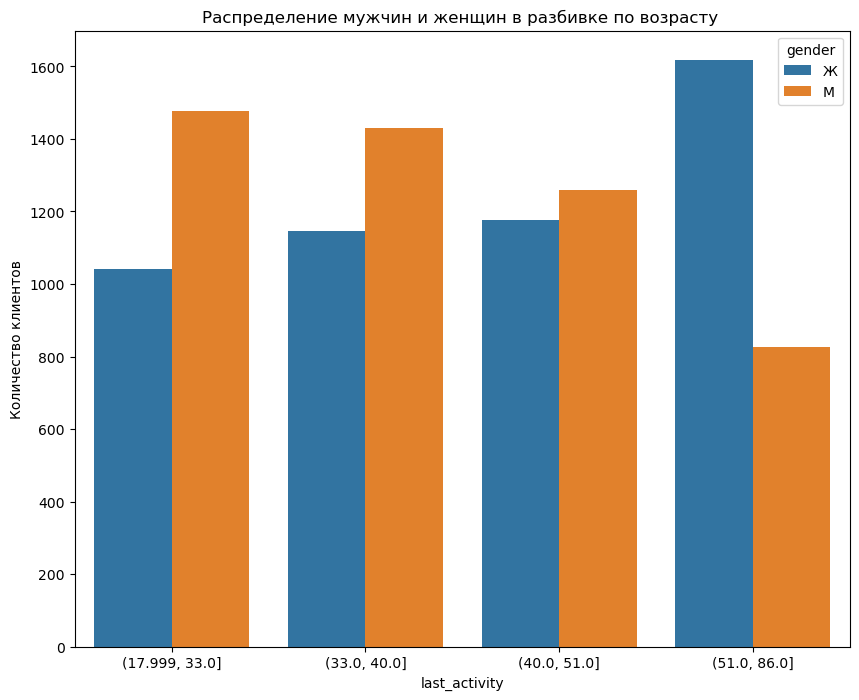

In [151]:
plt.figure(figsize=(10,8))
sns.countplot( data = data, x = 'age_bins', hue = 'gender')
plt.title('Распределение мужчин и женщин в разбивке по возрасту ')
plt.xlabel('last_activity')
plt.ylabel('Количество клиентов')
plt.show()

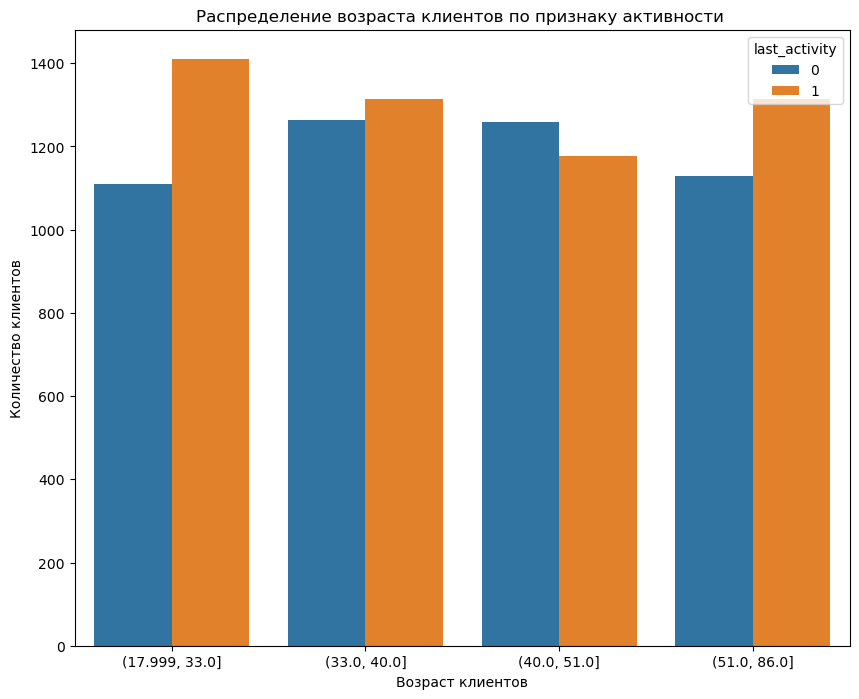

In [152]:
plt.figure(figsize=(10,8))
sns.countplot( data = data, x = 'age_bins', hue = 'last_activity')
plt.title('Распределение возраста клиентов по признаку активности ')
plt.xlabel('Возраст клиентов')
plt.ylabel('Количество клиентов')
plt.show()

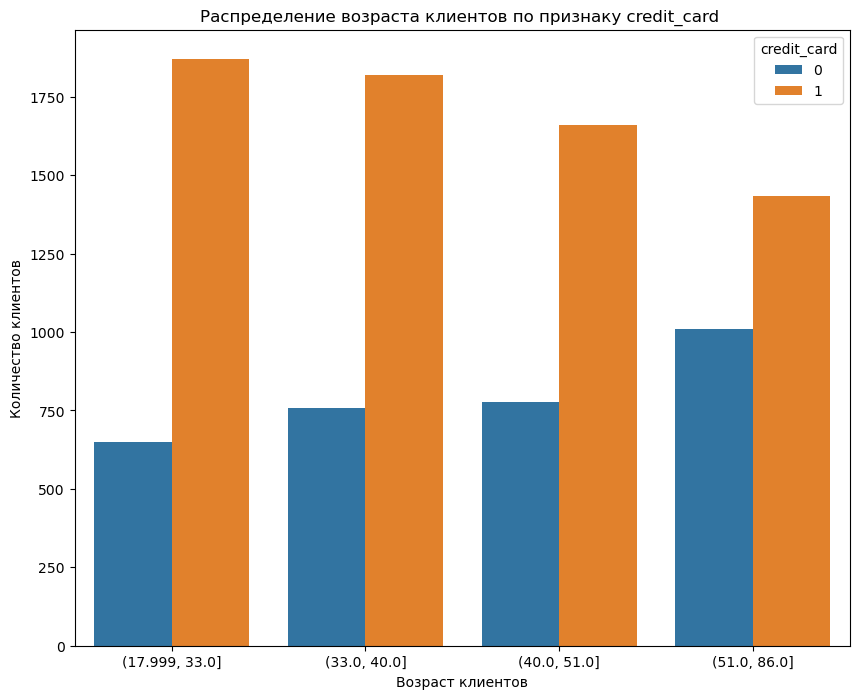

In [153]:
plt.figure(figsize=(10,8))
sns.countplot( data = data, x = 'age_bins', hue = 'credit_card')
plt.title('Распределение возраста клиентов по признаку credit_card ')
plt.xlabel('Возраст клиентов')
plt.ylabel('Количество клиентов')
plt.show()

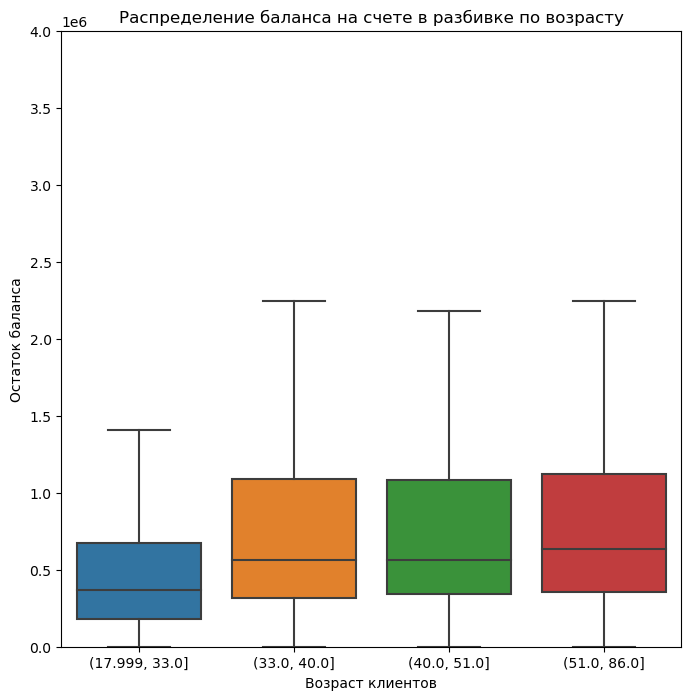

In [154]:
plt.figure(figsize=(8,8))
sns.boxplot( data = data, x = 'age_bins', y =  'balance',  showfliers = False)
plt.title('Распределение баланса на счете в разбивке по возрасту')
plt.xlabel('Возраст клиентов')
plt.ylabel('Остаток баланса')
plt.ylim(0,4000000)
plt.show()  

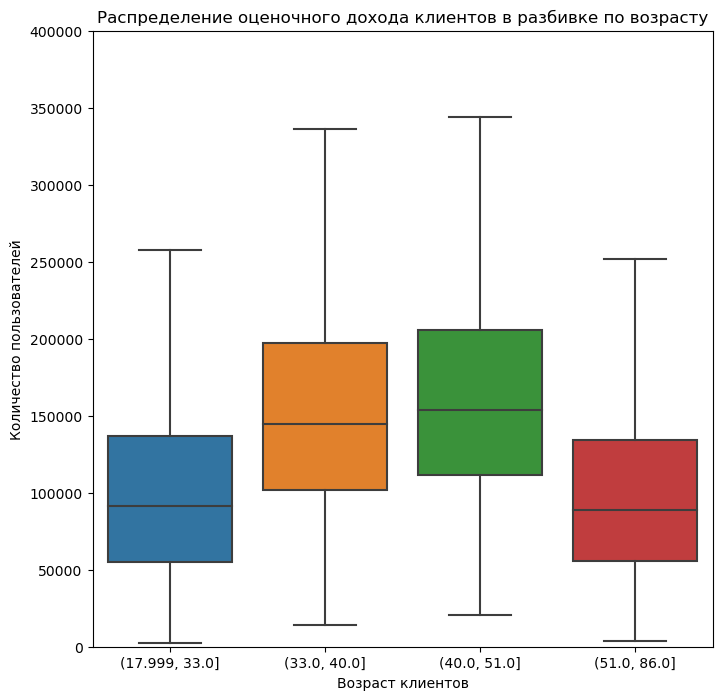

In [155]:
plt.figure(figsize=(8,8))
sns.boxplot( data = data, x = 'age_bins', y =  'est_salary',  showfliers = False)
plt.title('Распределение оценочного дохода клиентов в разбивке по возрасту')
plt.xlabel('Возраст клиентов')
plt.ylabel('Количество пользователей')
plt.ylim(0,400000)
plt.show()  

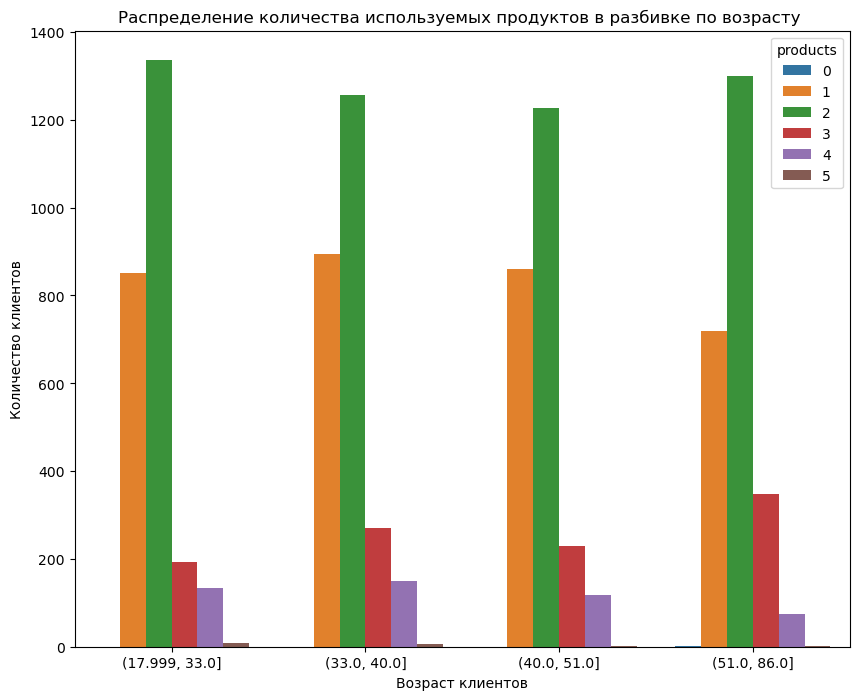

In [156]:
plt.figure(figsize=(10,8))
sns.countplot( data = data, x = 'age_bins', hue = 'products')
plt.title('Распределение количества используемых продуктов в разбивке по возрасту ')
plt.xlabel('Возраст клиентов')
plt.ylabel('Количество клиентов')
plt.show()

Сегментация пользователей на основе возраста клиентов дала следующие результаты: 

   * Клиенты в возрасте от 18 до 33 лет: Доля - 25 % от общего числа клиентов. Мужчин больше чем женщин. Активных клиентов больше чем неактивных. Число клиентов с кредитной картой больше чем число клиентов без кредитной карты. Средний остаток на балансе - 340000. Средний оценочный доход составил 90000 рублей. 
   * Клиенты в возрасте от 33 до 40 лет. Доля - 25 % от общего числа клиентов. Мужчин больше чем женщин. Активных клиентов больше чем неактивных. Средний остаток на балансе равен 600000 рублей. Средний уровень оценочного дохода - 150000 рублей. Число клиентов с кредитной картой больше чем число клиентов без кредитной карты. 
   * Клиенты в возрасте от 40 до 51 года. Доля - 25 % от общего числа клиентов. Мужчин больше чем женщин. Активных клиентов меньше чем неактивных. Средний остаток на балансе равен 600000 рублей. Средний уровень оценочного дохода - 160000 рублей. Число клиентов с кредитной картой больше чем число клиентов без кредитной карты. 
   * Клиенты в возрасте от 51 до 86 лет. Доля - 25 % от общего числа клиентов. Женщин больше чем мужчин. Активных клиентов больше чем неактивных. Средний остаток на балансе равен 650000 рублей. Средний уровень оценочного дохода - 80000 рублей. Число клиентов с кредитной картой больше чем число клиентов без кредитной карты. 
   
     

На основании проведенной сегментации пользователей по признакам: products, last_activity и age_bins можно сформировать 3 основных сегмента: 

  Сегмент №1:
  
  * Пол: Мужчина 
  * Пользовательская активность: да
  * Наличие кредитной карты: нет
   
   Сегмент N2: 
  * Пол: Женщина 
  * Количество продуктов: 1
  * Пользовательская активность: нет
  
   
   Сегмент N3: 
   
  * Пол: Мужчина 
  * Возраст: от 51 до 86 
  * Пользовательская активность: да
  
   

## 19 4.3 Подсчет оттока клиентов внутри сегмента 

In [157]:
# Посчитаем количество клиентов внутри 1 сегмента
segment1_count = len(data.query('gender == "М" and last_activity == 1  and credit_card == 0'))
# Посчитаем количество отточных  клиентов в 1 сегменте 
segment1_churn = len(data.query('gender == "М" and last_activity == 1  and credit_card == 0 and churn ==1'))

# Посчитаем процент оттока внутри 1 сегмента 
segment1_churn_percentage = round((segment1_churn / segment1_count) * 100,2)

print('Количество отточных клиентов:',segment1_churn )
print('Всего пользователей внутри 1 сегмента:',segment1_count) 
print('Процент оттока клиентов внутри 1 сегмента:', segment1_churn_percentage , "%")


Количество отточных клиентов: 302
Всего пользователей внутри 1 сегмента: 718
Процент оттока клиентов внутри 1 сегмента: 42.06 %


In [158]:

# Посчитаем количество клиентов внутри 2 сегмента
segment2_count = len(data.query('gender == "Ж" and last_activity == 0  and products == 1'))

# Посчитаем количество отточных  клиентов в 2 сегменте 
segment2_churn = len(data.query('gender == "Ж" and last_activity == 0  and products == 1 and churn ==1'))

# Посчитаем процент оттока внутри 2 сегмента 
segment2_churn_percentage = round((segment2_churn / segment2_count) * 100,2)

print('Количество отточных клиентов внутри 2 сегмента:',segment2_churn )
print('Всего пользователей внутри 2 сегмента:',segment2_count) 
print('Процент оттока клиентов внутри 2 сегмента:', segment2_churn_percentage , "%")

Количество отточных клиентов внутри 2 сегмента: 18
Всего пользователей внутри 2 сегмента: 725
Процент оттока клиентов внутри 2 сегмента: 2.48 %


In [159]:
# Посчитаем количество клиентов внутри 3 сегмента
segment3_count = len(data.query('gender == "М" and last_activity == 1  and age > 51 and age < 86'))

# Посчитаем количество отточных  клиентов в 3 сегменте 
segment3_churn =  len(data.query('gender == "М" and last_activity == 1  and age > 51 and age < 86 and churn == 1'))

# Посчитаем процент оттока внутри 3 сегмента 
segment3_churn_percentage = round((segment3_churn / segment3_count) * 100,2)

print('Количество отточных клиентов внутри 3 сегмента:',segment3_churn )
print('Всего пользователей внутри 3 сегмента:',segment3_count) 
print('Процент оттока клиентов внутри 3 сегмента:', segment3_churn_percentage , "%")

Количество отточных клиентов внутри 3 сегмента: 156
Всего пользователей внутри 3 сегмента: 439
Процент оттока клиентов внутри 3 сегмента: 35.54 %


## 20  4.4  Анализ портрета типового клиента 

In [160]:
#  Посмотрим на статистическое распределение признаков в 1 сегменте
portrait_1 = data.query('gender == "М" and last_activity == 1  and credit_card == 0')
print(len(portrait_1) / len(data) * 100)
portrait_1.describe()

7.198716663324644


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan,city_Rostov,city_Rybinsk,city_Yaroslavl,gender_Ж,gender_М
count,718.000000,718.000000,718.000000,718.000000,5.960000e+02,718.000000,718.0,718.0,7.180000e+02,718.000000,718.000000,718.000000,718.000000,718.000000,718.0,718.0
mean,172340.458217,863.250696,42.033426,3.271588,1.312456e+06,2.151811,0.0,1.0,1.627337e+05,0.420613,0.830084,0.192201,0.344011,0.463788,0.0,1.0
std,34795.576563,57.327278,11.437002,2.005585,2.602464e+06,0.808301,0.0,0.0,1.503989e+05,0.494002,0.375821,0.394305,0.475376,0.499035,0.0,0.0
min,97131.000000,718.000000,18.000000,0.000000,2.200000e+01,1.000000,0.0,1.0,9.766130e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,143780.500000,822.000000,33.000000,2.000000,3.933925e+05,2.000000,0.0,1.0,8.344927e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.0
50%,171333.000000,869.000000,40.000000,4.000000,8.121455e+05,2.000000,0.0,1.0,1.294150e+05,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.0
75%,202225.000000,903.000000,51.000000,5.000000,1.361082e+06,2.000000,0.0,1.0,1.893354e+05,1.000000,1.000000,0.000000,1.000000,1.000000,0.0,1.0
max,229058.000000,1000.000000,74.000000,9.000000,4.327710e+07,4.000000,0.0,1.0,1.395064e+06,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0


Сегмент 1:  Доля клиентов от общего количества клиентов составила 7.19 %. Клиенты живут в Ярославле, Ростове и Рыбинске. Средний возраст клиентов - 42 года. Остаток на балансе - 1312455 рублей. Среднее количество баллов кредитное скоринга равно 863. Количество баллов собственности от 0 до 9. Средний оценочный доход равен 162733 рублей. Возраст клиентов варьируется от 18 до 74 лет. Клиенты пользуются от 1 до 4 продуктов. Отток в данном сегменте составил 42.06 %.

In [161]:
#  Посмотрим на статистическое распределение признаков во 2 сегменте
portrait_2 = data.query('gender == "Ж" and last_activity == 0  and products == 1')
print(len(portrait_2) / len(data) * 100)
portrait_2.describe()

7.268899137758171


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan,city_Rostov,city_Rybinsk,city_Yaroslavl,gender_Ж,gender_М
count,725.000000,725.000000,725.000000,725.000000,3.330000e+02,725.0,725.000000,725.0,7.250000e+02,725.000000,725.000000,725.000000,725.000000,725.000000,725.0,725.0
mean,173162.211034,850.026207,44.725517,1.491034,5.573730e+05,1.0,0.859310,0.0,1.701234e+05,0.024828,0.459310,0.132414,0.240000,0.627586,1.0,0.0
std,33514.029365,75.375895,12.373580,1.952895,4.961774e+05,0.0,0.347941,0.0,1.657853e+05,0.155707,0.498686,0.339174,0.427378,0.483782,0.0,0.0
min,114209.000000,642.000000,18.000000,0.000000,2.000000e+01,1.0,0.000000,0.0,2.546300e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0
25%,143209.000000,799.000000,35.000000,0.000000,2.755303e+05,1.0,1.000000,0.0,8.054296e+04,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0
50%,175415.000000,872.000000,43.000000,0.000000,4.483326e+05,1.0,1.000000,0.0,1.333728e+05,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.0
75%,202150.000000,910.000000,54.000000,3.000000,6.938943e+05,1.0,1.000000,0.0,1.941064e+05,0.000000,1.000000,0.000000,0.000000,1.000000,1.0,0.0
max,229050.000000,986.000000,81.000000,7.000000,5.438612e+06,1.0,1.000000,0.0,1.261408e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0


Сегмент 2: Доля клиентов от общего количества клиентов составила 4.40 %. Клиенты живут в Ярославле, Ростове и Рыбинске. Средний возраст клиентов - 44.7 года. Средний остаток на балансе - 557373 рубля. Среднее количество баллов кредитного скоринга равно 850. Количество баллов собственности от 0 до 7. Средний оценочный доход равен 170123 рублей. Возраст клиентов варьируется от 18 до 81 года. Клиенты пользуются 1 продуктом. Отток в данном сегменте составил 2.48 %.


In [162]:
#  Посмотрим на статистическое распределение признаков в 3  сегменте
portrait_3 = data.query('gender == "М" and last_activity == 1  and age > 51 and age < 86')
print(len(portrait_3) / len(data) * 100)
portrait_3.describe()

4.401443753759775


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan,city_Rostov,city_Rybinsk,city_Yaroslavl,gender_Ж,gender_М
count,439.000000,439.000000,439.000000,439.000000,3.430000e+02,439.000000,439.000000,439.0,4.390000e+02,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.0
mean,173895.867882,848.954442,58.387244,2.858770,1.831339e+06,1.958998,0.599089,1.0,1.461161e+05,0.355353,0.781321,0.179954,0.296128,0.523918,0.0,1.0
std,33764.731236,68.641366,4.944017,2.031287,7.730409e+06,0.821044,0.490642,0.0,1.641543e+05,0.479166,0.413822,0.384588,0.457069,0.499997,0.0,0.0
min,99111.000000,642.000000,52.000000,0.000000,4.500000e+01,1.000000,0.000000,1.0,1.067773e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,147101.500000,805.000000,54.000000,1.000000,3.944281e+05,1.000000,0.000000,1.0,6.286458e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.0
50%,173512.000000,853.000000,58.000000,3.000000,7.485002e+05,2.000000,1.000000,1.0,1.035461e+05,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,1.0
75%,201959.500000,901.500000,61.000000,5.000000,1.329096e+06,2.000000,1.000000,1.0,1.592348e+05,1.000000,1.000000,0.000000,1.000000,1.000000,0.0,1.0
max,229058.000000,990.000000,74.000000,8.000000,1.191136e+08,5.000000,1.000000,1.0,1.185540e+06,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0


Сегмент 3: Доля клиентов от общего количества клиентов составила 4.40 %. Клиенты живут в Ярославле, Ростове и Рыбинске. Средний возраст клиентов - 58.3 года. Средний остаток на балансе - 1831339 рублей. Среднее количество баллов кредитного скоринга равно 849. Количество баллов собственности от 0 до 8. Средний оценочный доход равен 146116 рублей. Возраст клиентов варьируется от 52 до 74 лет. Клиенты пользуются от 1 до 5 продуктов. Отток в данном сегменте составил 35.54 %.


Выводы по сегментации пользователей: 

   * На основании проведенной сегментации пользователей по признакам : products, last_activity и age были сформированы более конкретные 3 сегмента с отличительными чертами в каждой. 
   * В первый сегмент попали мужчины , проявляющие активность в последнее время и не имеющие кредитную карту.
   * Во второй сегмент попали женщины, использующие 1 продукт и неактивные в последнее время 
   * В третий сегмент попали все мужчины в возрасте от 51 до 86 лет, являющиеся активными в последнее время.
   * Для каждого сегмента был посчитан процент оттока от общего количества сегмента
   * Был составлен типовой портрет клиента для каждого сегмента пользователей

 ## 21 5 Общие выводы: 

   Проект 'Анализ и сегментация пользователей на основе количества используемых продуктов завершен' .  В ходе выполнения проектной работы были изучены и решены цели исследования. 
     
   Проведенное исследование содержало в себе 4 основных шага
     
   1) На первом шаге исследования были загружены данные и  изучена общая информация о клиентах банка 'Метанпром', проделана работа по изучению данных, приведению их к нужному типу, там, где было необходимо, удалили пропуски и дубликаты, провели кодирование категориальных признаков 
   
   2) На этапе исследовательского анализа данных получили следующие результаты: 
    
  *  81.8 % клиентов остаются в банке, 18.2 % уходят;
  *  68 % клиентов используют кредитную карту, 32 % не используют ;
  *  наибольшая часть клиентов пользуются 1 либо 2 банковскими продуктами;
  *  вероятность оттока клиентов с 4 и 5 продуктами высокая;
  *  средний возраст клиента банка равен 42 годам;
  *  52.3 % клиентов банка являются активными;
  *  больше половины клиентов банка осблуживаются в Ярославле;
  *  клиенты с 7 и 9 баллами собственности чаще других хотят уйти из банка;
  *  проведена категоризация непрерывных признаков для age, score, balance и est_salary;
  *  клиенты, не имеющие кредитной карты, с большей вероятностью уходят из банка, чем клиенты не использующие кредитную карту;
  *  оценочный доход клиентов, склонных к оттоку, составляет от 100000 до 200000 рублей;
  *  процент оттока клиентов зависит от остатка баланса на счете. Клиенты , имеющие остаток баланса выше 750000 рублей чаще уходят из банка
  *  клиенты, имеющие от 819 до 886 баллов кредитного скоринга, чаще уходят из банка
  *  наиболее склонны к уходу из банка клиенты в возрасте от 18 до 33 лет и от 51 до 86 лет

   3) На третьем шаге исследования были сформулированы и проверены статистические гипотезы о равенстве среднего возраста клиентов, пользующихся одним продуктом банка и клиентов,пользующихся двумя продуктами и о равенстве среднего оценочного дохода активных и неактивных клиентов.
   
      По результатам проверок статистических гипотез обнаружено:
      
       * есть статистически значимая разница между средним возрастом клиента и количеством продуктов, которыми он пользуется;
        
       * нет статистически значимой разницы между средним оценочным доходом активных и неактивных клиентов.

   4) На четвертом шаге исследования была проведена сегментация пользователей на основе количества используемых продуктов, возраста и пользовательской активности. Были получены следующие результаты: 
    * Сегмент 1: Доля клиентов от общего количества клиентов составила 7.19 %. Клиенты живут в Ярославле, Ростове и Рыбинске. Средний возраст клиентов - 42 года. Остаток на балансе - 1312455 рублей. Среднее количество баллов кредитное скоринга равно 863. Количество баллов собственности от 0 до 9. Средний оценочный доход равен 162733 рублей. Возраст клиентов варьируется от 18 до 74 лет. Клиенты пользуются от 1 до 4 продуктов. Отток в данном сегменте составил 42.06 %.
    
   * Сегмент 2: Доля клиентов от общего количества клиентов составила 4.40 %. Клиенты живут в Ярославле, Ростове и Рыбинске. Средний возраст клиентов - 44.7 года. Средний остаток на балансе - 557373 рубля. Среднее количество баллов кредитного скоринга равно 850. Количество баллов собственности от 0 до 7. Средний оценочный доход равен 170123 рублей. Возраст клиентов варьируется от 18 до 81 года. Клиенты пользуются 1 продуктом. Отток в данном сегменте составил 2.48 %.

   * Сегмент 3: Доля клиентов от общего количества клиентов составила 4.40 %. Клиенты живут в Ярославле, Ростове и Рыбинске. Средний возраст клиентов - 58.3 года. Средний остаток на балансе - 1831339 рублей. Среднее количество баллов кредитного скоринга равно 849. Количество баллов собственности от 0 до 8. Средний оценочный доход равен 146116 рублей. Возраст клиентов варьируется от 52 до 74 лет. Клиенты пользуются от 1 до 5 продуктов. Отток в данном сегменте составил 35.54 %.

    
    
    
    
   На основании проведенного исследования можно дать определенные рекомендации для заказчика: 
   * для 1 сегмента: в этом сегменте самый больщой процент оттока клиентов - 42 %. Клиенты этого сегмента не имеют кредитной карты, ранее мы выяснили, что наличие кредитной карты снижает вероятность оттока, поэтому рекомендуется выдавать таким клиентам кредитную карту 
   * для 2 сегмента : в этом сегменте наблюдается самый низкий процент оттока клиентов - 2.48 %. Стоит поддерживать лояльность клиентов на высоком уровне, так как многие довольны работой банка и не собираются уходить.
   * для 3 сегмента: в этом сегмента довольно высокий процент оттока - 35 %. Возраст клиентов этого сегмента от 51 до 86 лет, как мы уже убедились ранее они имеют высокую вероятность к уходу из банка. Возможно стоит предлагать таким клиентам дополнительный продукт в виде страхования собственности

## 22 6 Подготовка презентации и дашборда

Ссылка на презентацию: https://disk.yandex.ru/i/KucxOdiba2UVFw 